# EDA palmer penguins 

Análisis exploratorio de datos del data set `palmer penguins` como proyecto del curso ["Análisis exploratorio de datos"](https://platzi.com/cursos/analisis-exploratorio-datos/).

![penguins](./imgs/penguins.png)

Configuración inicial para recargar los modulos propios del proyecto:

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

import eda_penguins_modules.utils.paths as path

Librerias:

In [3]:
import empiricaldist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

## Apariencia general de los graficos

In [4]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Preview y carga del data set

In [5]:
input_file = path.data_processed_dir("preprocessed_palmerpenguins.csv")
penguins_df = pd.read_csv(input_file)
penguins_df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

In [6]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


### Glosario de variables
El dataset consta de 8 variables, aquí una breve descripción del significado de cada varibale:
- `species`: Nombre de la especie del pingüino (Chinstrap, Adélie, or Gentoo).
- `island`: Nombre de la isla.
- `bill_length_mm`: Largo del pico en milimetros.
- `bill_depth_mm`: Profundidad/ancho del pico en milimetros.
- `flipper_length_mm`: Largo de la aleta en milimetros.
- `body_mass_g`: Masa corporal en gramos.
- `sex`: Sexo del pingüino (Male/Female).
- `year`: Año en que se tomó la muestra.

<div align="center">
  <img src="./imgs/bill_depth.png" alt="Bill/Culmen characteristics" width="500" heigh="500">
</div>

## Validación de datos

**¿Qué tipo de datos son las variables del dataset?**

In [7]:
penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

**¿Cuántas variables de cada tipo de datos tenemos en el dataset?**

In [8]:
(
  penguins_df
  .dtypes
  .value_counts()
)

float64    4
object     3
int64      1
dtype: int64

**¿Cuantas variables y observaciones tenemos?**

In [9]:
rows, columns = penguins_df.shape
print(f"Observaciones: {rows}")
print(f"variables: {columns}")

Observaciones: 344
variables: 8


**¿Existen valores nulos explícitos?**

In [10]:
(
  penguins_df
  .isnull()
  .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

**De tener observaciones con valores nulos, ¿cuántos tenemos por cada variable?** 

In [11]:
(
  penguins_df
  .isnull()
  .sum()
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

**¿Cuántos valores nulos hay en total en el dataset?**

In [12]:
(
  penguins_df
  .isnull()
  .sum()
  .sum()
)

19

**¿Cuál es la proporción de los valores nulos por cada variable?**

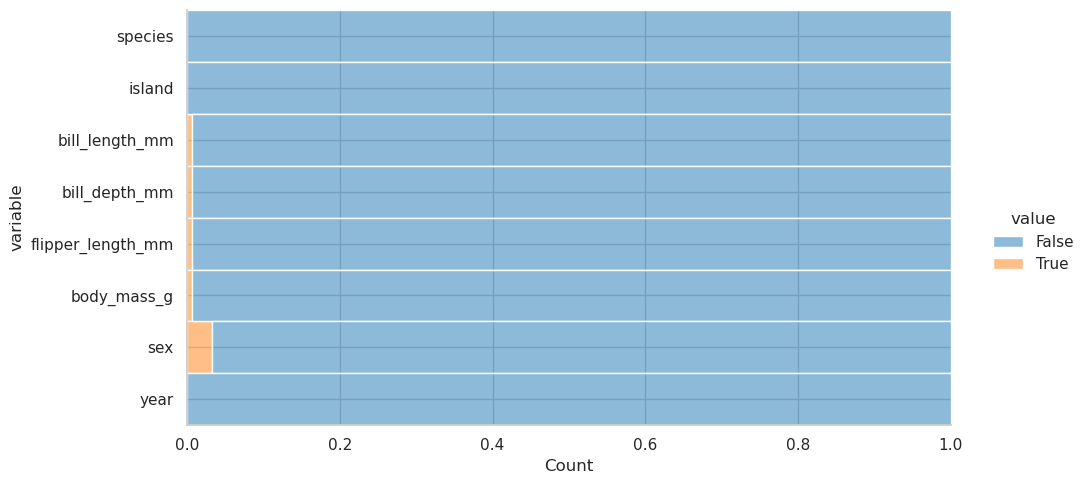

In [13]:
(
  penguins_df
  .isnull()
  .melt()
  .pipe(
    lambda df: (
      sns.displot(
        data=df,
        y='variable',
        hue='value',
        multiple='fill',
        aspect=2,
        alpha=0.5
      )
    )
  )
)
plt.show()

**Visualizando valores nulos en todo el dataset**

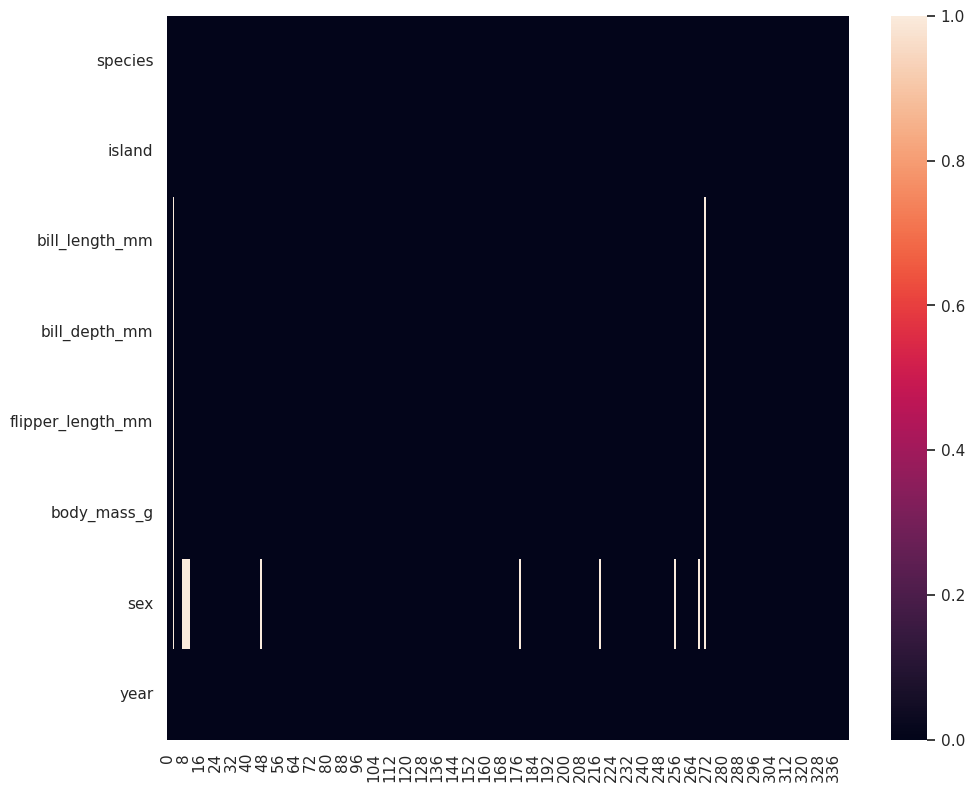

In [14]:
(
  penguins_df
  .isnull()
  .transpose()
  .pipe(
    lambda df: (
      sns.heatmap(data=df)
    )
  )
)
plt.show()

In [15]:
penguins_df.loc[271]

species              Gentoo
island               Biscoe
bill_length_mm          NaN
bill_depth_mm           NaN
flipper_length_mm       NaN
body_mass_g             NaN
sex                     NaN
year                   2009
Name: 271, dtype: object

**¿Cuántas observaciones perdemos si eliminamos los datos faltantes?**

In [16]:
penguins_df.shape

(344, 8)

In [17]:
processed_penguins_df = penguins_df.dropna()
processed_penguins_df.shape

(333, 8)

Eliminamos la variable `year`

In [18]:
processed_penguins_df.drop('year', axis=1, inplace=True)
processed_penguins_df.head()

/home/pahoalapizco/anaconda3/envs/eda_penguins/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    male  
1       3800.0  female  
2       3250.0  female  
4       3450.0  female  
5       3650.0    male

## Conteos y proporciones

### Preludio: ¿Qué estadisticos describen mejor el dataset?

**Todas las variables**

In [19]:
processed_penguins_df.describe(include="all")

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      333     333      333.000000     333.000000         333.000000   
unique       3       3             NaN            NaN                NaN   
top     Adelie  Biscoe             NaN            NaN                NaN   
freq       146     163             NaN            NaN                NaN   
mean       NaN     NaN       43.992793      17.164865         200.966967   
std        NaN     NaN        5.468668       1.969235          14.015765   
min        NaN     NaN       32.100000      13.100000         172.000000   
25%        NaN     NaN       39.500000      15.600000         190.000000   
50%        NaN     NaN       44.500000      17.300000         197.000000   
75%        NaN     NaN       48.600000      18.700000         213.000000   
max        NaN     NaN       59.600000      21.500000         231.000000   

        body_mass_g   sex  
count    333.000000   333  
unique          NaN     2  
top             NaN  male  
freq            NaN   168  
mean    4207.057057   NaN  
std      805.215802   NaN  
min     2700.000000   NaN  
25%     3550.000000   NaN  
50%     4050.000000   NaN  
75%     4775.000000   NaN  
max     6300.000000   NaN

**Numéricas**

In [20]:
processed_penguins_df.describe(include=[np.number])

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000

**Categóricas (1)**

In [21]:
# Visualizar los conteos y frecuencias de variables categóricas que por defualt son de tipo "object"
processed_penguins_df.describe(include=object)

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

**Categóricas  (2)**

In [22]:
# Casteo de tipo de object a category, con el fin de identificar exlusivamente aquellas variables
# que son realmente categoricas.
(
  processed_penguins_df
  .astype({
    "species": "category",
    "island": "category",
    "sex": "category"
  })
  .describe(include="category")
)

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

### Visulización de los conteos

**Pandas**

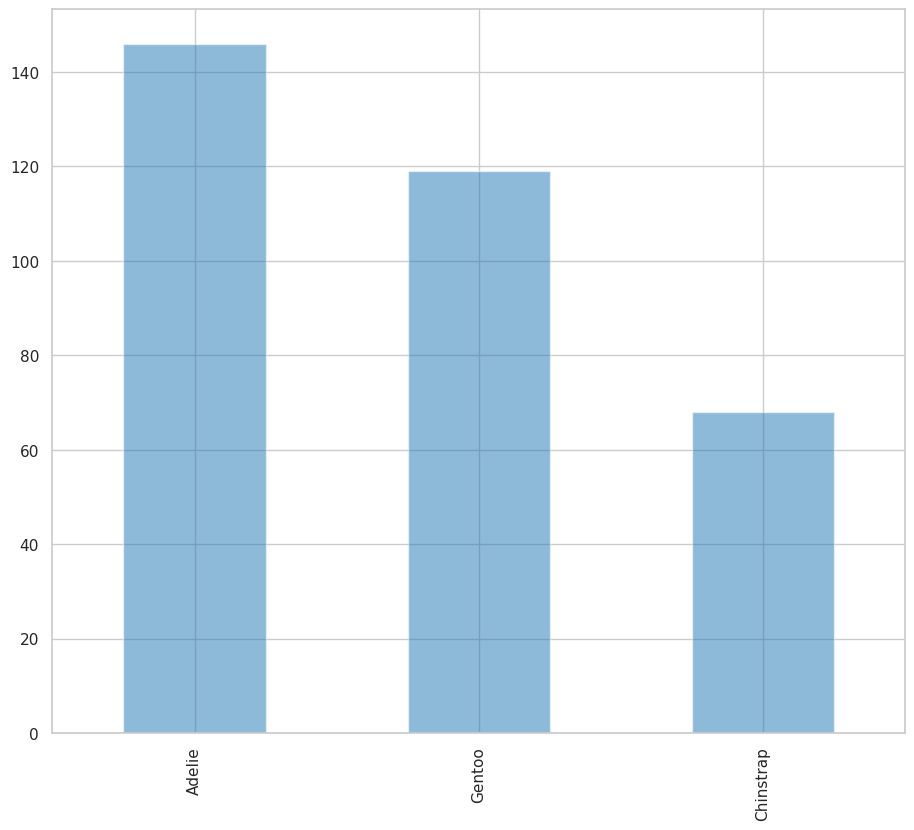

In [23]:
(
  processed_penguins_df
  .species
  .value_counts()
  .plot(
    kind="bar",
    alpha=0.5
  )
)
plt.show()

**Seaborn**

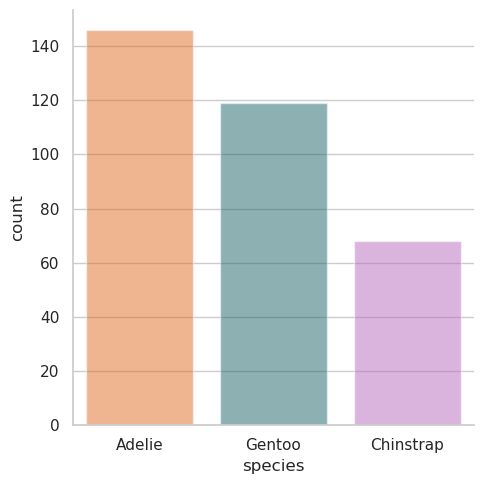

In [24]:
sns.catplot(
  data=processed_penguins_df,
  x="species",
  kind="count",
  palette=penguin_color,
  alpha=0.5
)
plt.show()

2da forma haciendo un conteo "manual"

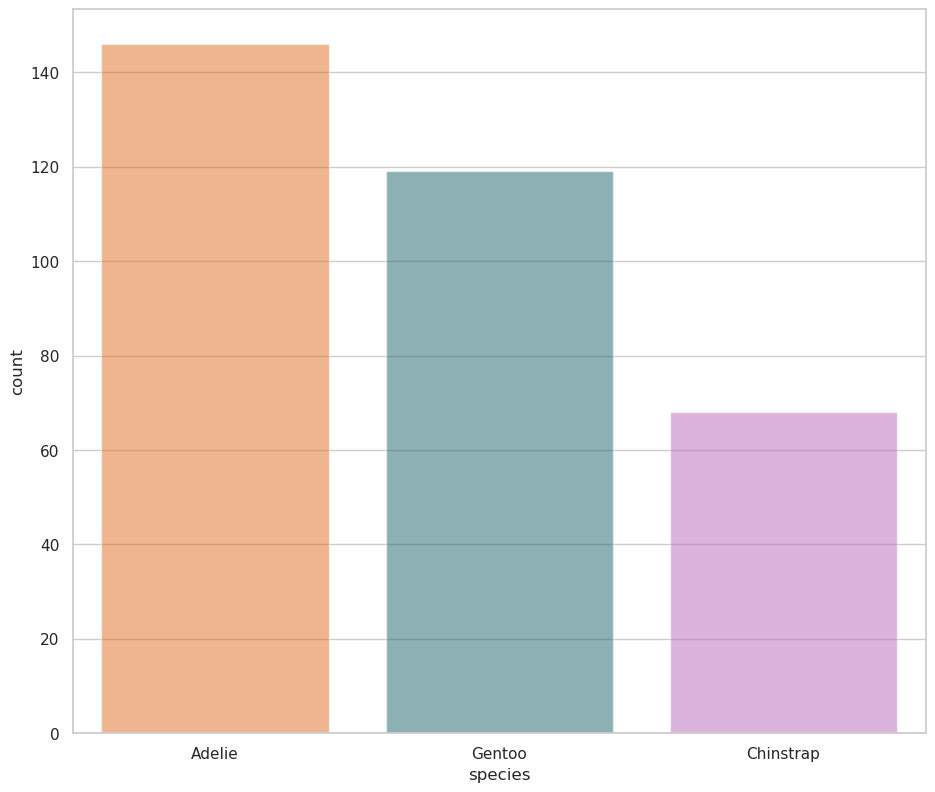

In [25]:
(
  processed_penguins_df
  .value_counts("species", sort=True)
  .reset_index(name="count")
  .pipe(
    lambda df: (
      sns.barplot(
        data=df,
        x="species",
        y="count",
        palette=penguin_color,
        alpha=0.5
      )
    )
  )
)
plt.show()

Conteos de las variables categóricas

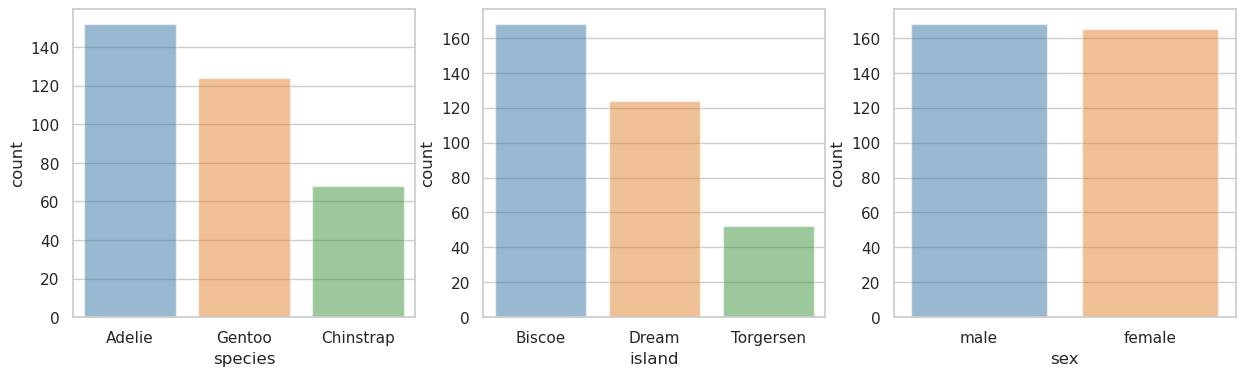

In [26]:
categories = processed_penguins_df.select_dtypes(include=object).columns

# Visualizar los conteos de todas las variables cateogóricas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
for idx in range(len(categories)):
  (
    penguins_df
    .value_counts(categories[idx], sort=True)
    .reset_index(name="count")
    .pipe(
      lambda df: (
        sns.barplot(
          data=df,
          x=categories[idx],
          y="count",
          ax=axes[idx],
          alpha=0.5
        )
      )
    )
  )

### Visulización los proporciones

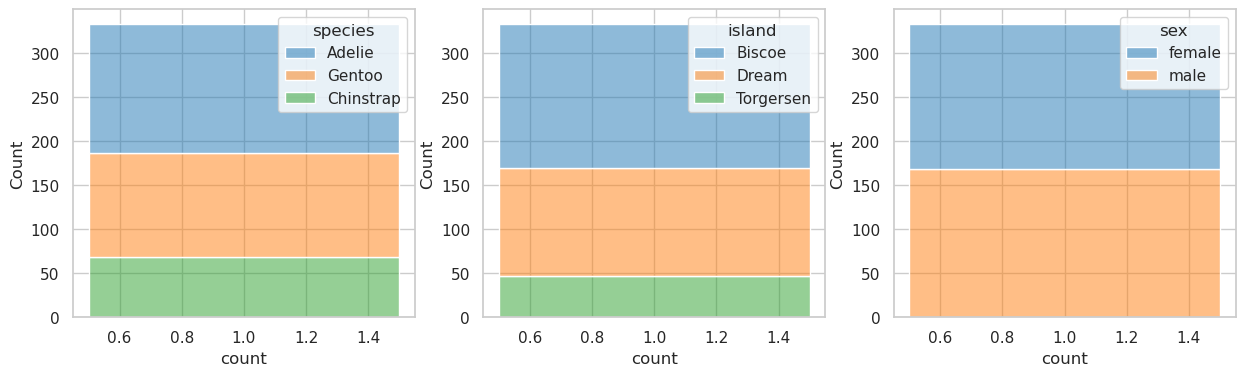

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

for i in range(len(categories)):
  (
    processed_penguins_df
    .value_counts()
    .reset_index(name="count")
    .pipe(
      lambda df: (
        sns.histplot(
          data=df,
          x="count",
          hue=categories[i],
          multiple="stack",
          ax=axes[i],
          alpha=0.5
        )
      )
    )
  )

## Medidas de tendencia central

**Media**

In [28]:
processed_penguins_df.mean(numeric_only=True)

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
dtype: float64

**Mediana**

In [29]:
processed_penguins_df.median(numeric_only=True)

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
dtype: float64

**Moda**

In [30]:
processed_penguins_df.mode()

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Biscoe            41.1           17.0              190.0   

   body_mass_g   sex  
0       3800.0  male

## Medidas de dispersión

### Rango de las variables

**Máximos**

In [31]:
processed_penguins_df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
dtype: float64

**Mínimos**

In [32]:
processed_penguins_df.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
dtype: float64

**Rangos**

In [33]:
processed_penguins_df.max(numeric_only=True) - processed_penguins_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
dtype: float64

### Desviación estándar

In [34]:
processed_penguins_df.std(numeric_only=True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
dtype: float64

### Rango intercuartílico

**Q1** o Primer cuartíl

In [35]:
processed_penguins_df.quantile(0.25)

bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
Name: 0.25, dtype: float64

**Q2** o Segundo cuartíl = Mediana

In [36]:
processed_penguins_df.quantile(0.5)

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
Name: 0.5, dtype: float64

**Q3** o Tercer cuartíl

In [37]:
processed_penguins_df.quantile(0.75)

bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
Name: 0.75, dtype: float64

**Rango intercuartilico** `Q3 - Q1`

In [38]:
processed_penguins_df.quantile(0.75) - processed_penguins_df.quantile(0.25)

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
dtype: float64

In [39]:
(
  processed_penguins_df
  .quantile(q=[0.25, 0.5, 0.75])
  .transpose()
  .rename_axis("variable")
  .reset_index()
  .assign(
    iqr=lambda df: df[0.75] - df[0.25]
  )
)

variable    0.25     0.5    0.75     iqr
0     bill_length_mm    39.5    44.5    48.6     9.1
1      bill_depth_mm    15.6    17.3    18.7     3.1
2  flipper_length_mm   190.0   197.0   213.0    23.0
3        body_mass_g  3550.0  4050.0  4775.0  1225.0

## Visualización de la distribución de las variables

In [40]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
  """Find optimal bandwidth using Freedman Diaconis rule."""
  IQR = x.quantile(0.75) - x.quantile(0.25)
  N = x.size

  return 2 * IQR / N**(1/3)

**Histograma**

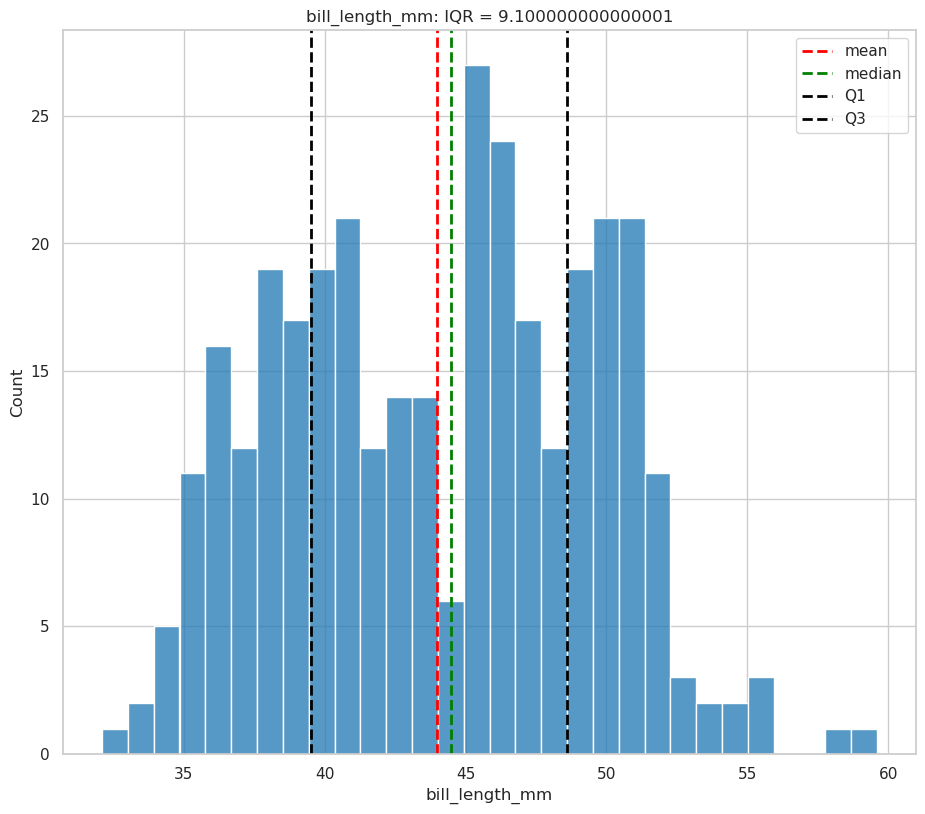

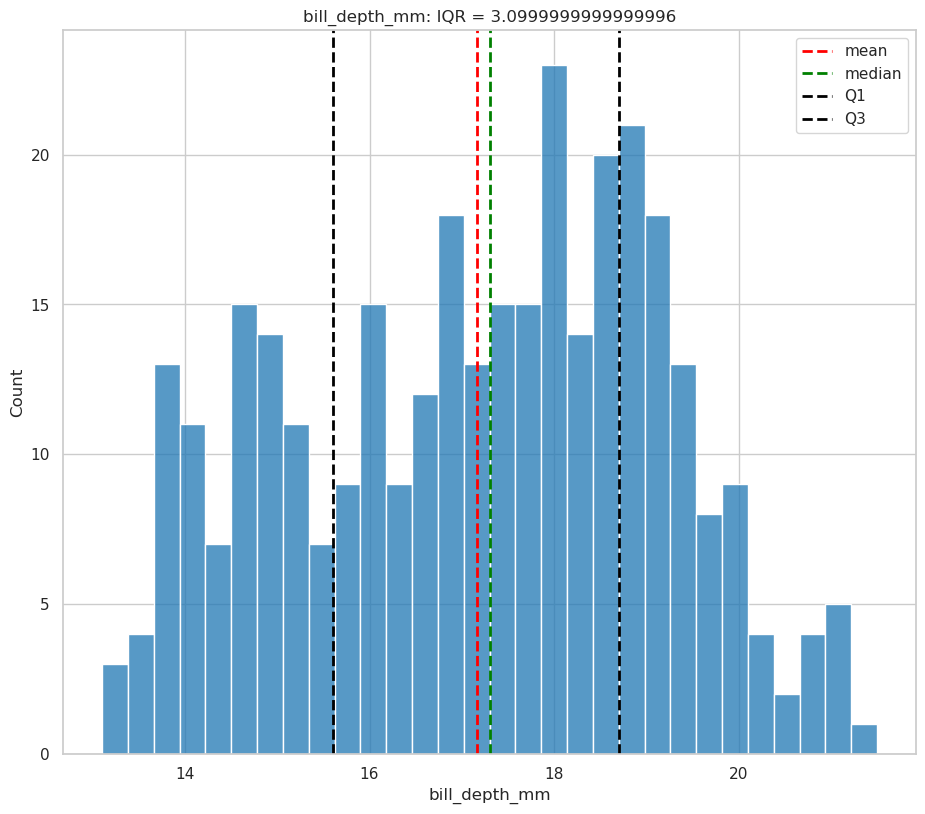

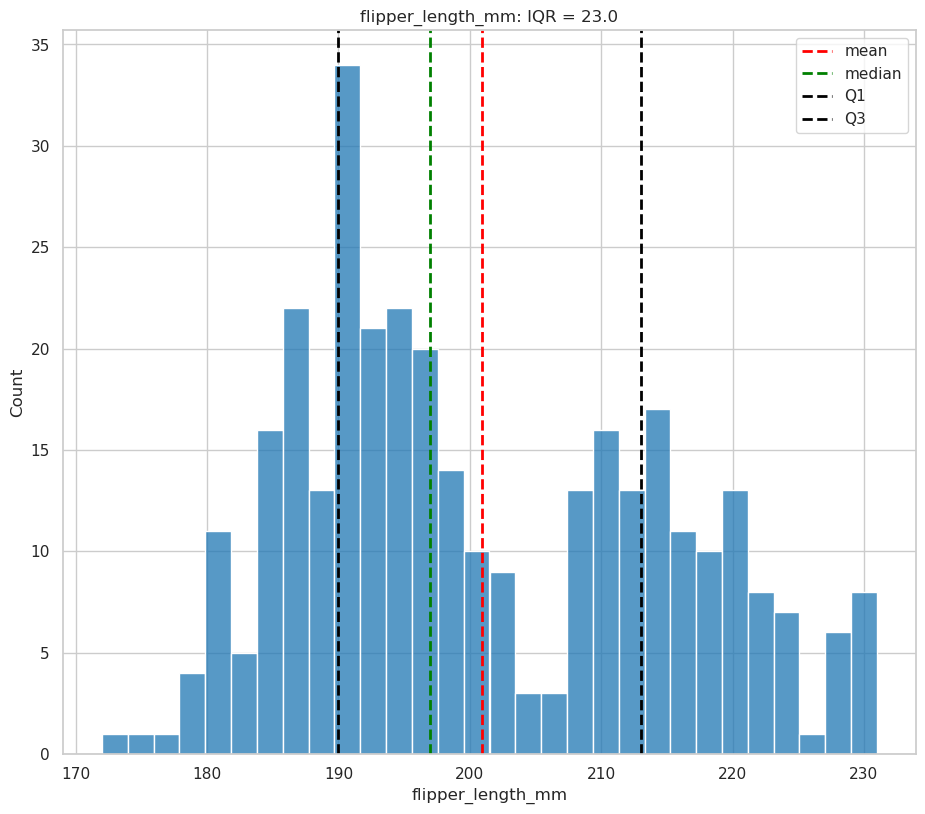

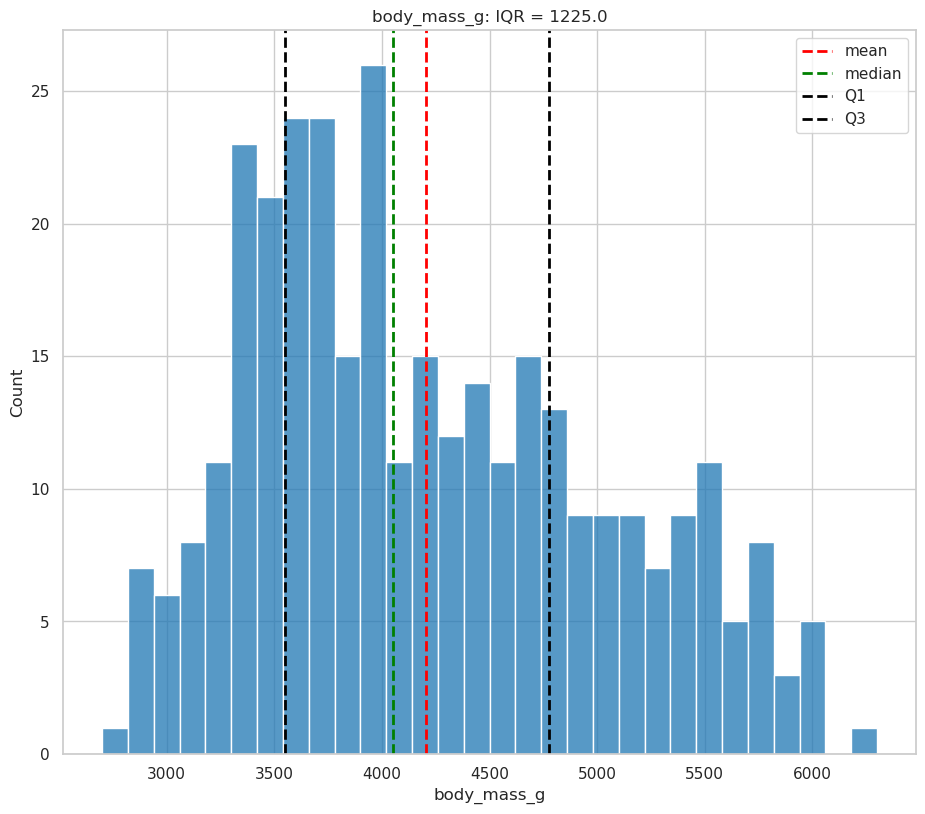

In [41]:
variables_arr = processed_penguins_df.describe(include=np.number).columns

for i in range(len(variables_arr)):
  var = variables_arr[i]

  sns.histplot(
    data=processed_penguins_df,
    x=var,
    bins=30,
    # binwidth=freedman_diaconis_bindwidth(processed_penguins_df[var])
  )
  
  q1 = processed_penguins_df[var].quantile(0.25)
  q3 = processed_penguins_df[var].quantile(0.75)
  iqr = q3 - q1
  mean = processed_penguins_df[var].mean()
  median = processed_penguins_df[var].median()

  plt.axvline(x=mean, color="red", linestyle="--", linewidth=2, label="mean")
  plt.axvline(x=median, color="green", linestyle="--", linewidth=2, label="median")
  plt.axvline(x=q1, color="black", linestyle="--", linewidth=2, label="Q1")
  plt.axvline(x=q3, color="black", linestyle="--", linewidth=2, label="Q3")
  
  plt.legend()
  plt.title(f"{var}: IQR = {iqr}")

  plt.show()

**Diagrama de cajas/boxplot**

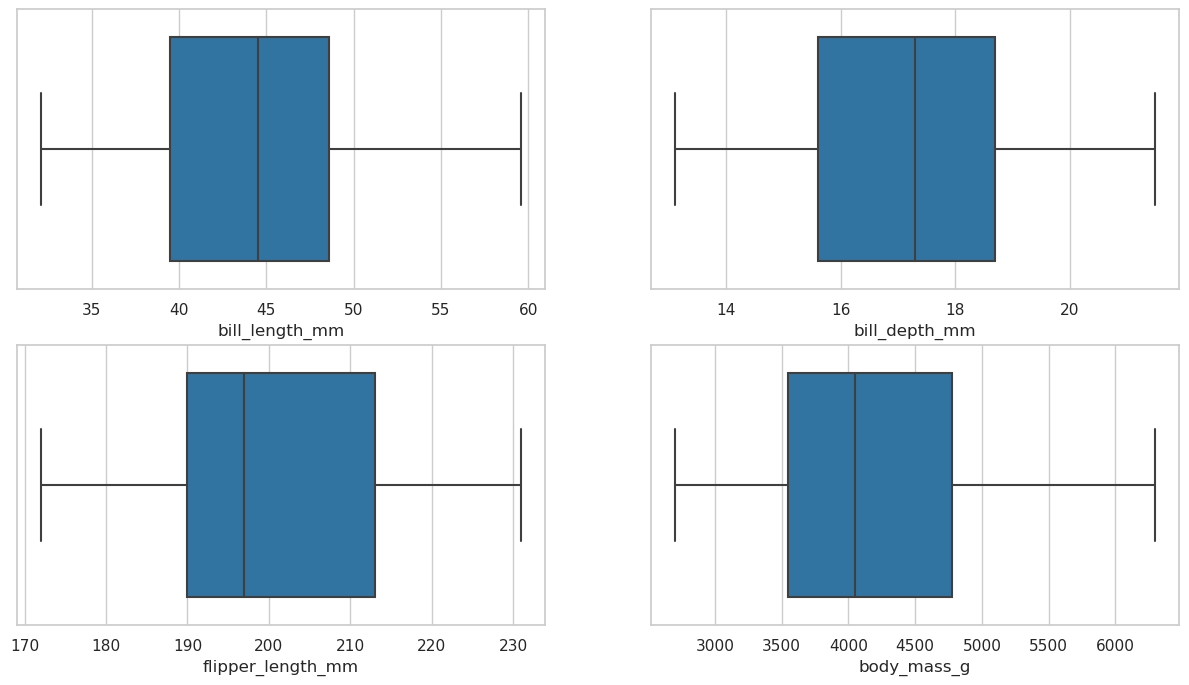

In [42]:
variables_arr = processed_penguins_df.describe(include=np.number).columns

fig, axes = plt.subplots(nrows= 2, ncols=2, figsize=(15,8))

r, c = 0, 0

for i in range(len(variables_arr)):
  var = variables_arr[i]

  sns.boxplot(
    data=processed_penguins_df,
    x=var,
    ax=axes[r][c]
  )

  c +=1
  if c > 1:
    r += 1
    c = 0


## Distribuciones de probabilidad: PMFs, CDFs, PDFs

In [43]:
processed_penguins_df.describe(include=np.number).columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

### Función de probabilidad de masas (PMF)

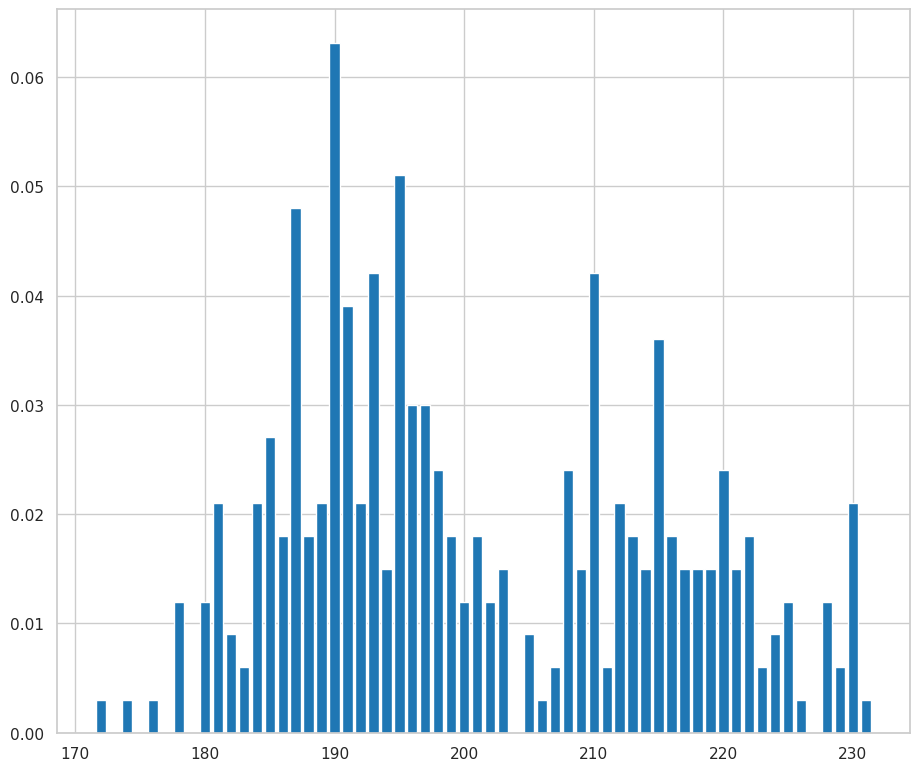

In [44]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
  processed_penguins_df["flipper_length_mm"], 
  normalize=True
)

pmf_flipper_length_mm.bar()

Probabilidad de encontrar un pingüino con una longitud de ala de 185mm

In [45]:
pmf_flipper_length_mm(185)

0.02702702702702703

### Función de probabilidad acumulada (CDF)

Con la libreria `empiricaldist` se ve como "Empirical Cumulative Density Funtion

In [46]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
  processed_penguins_df["flipper_length_mm"],
  normalize=True
)

¿Cuál es la probabilidad de encontrar un pingüino con una lingitud de ala menor a 200mm?

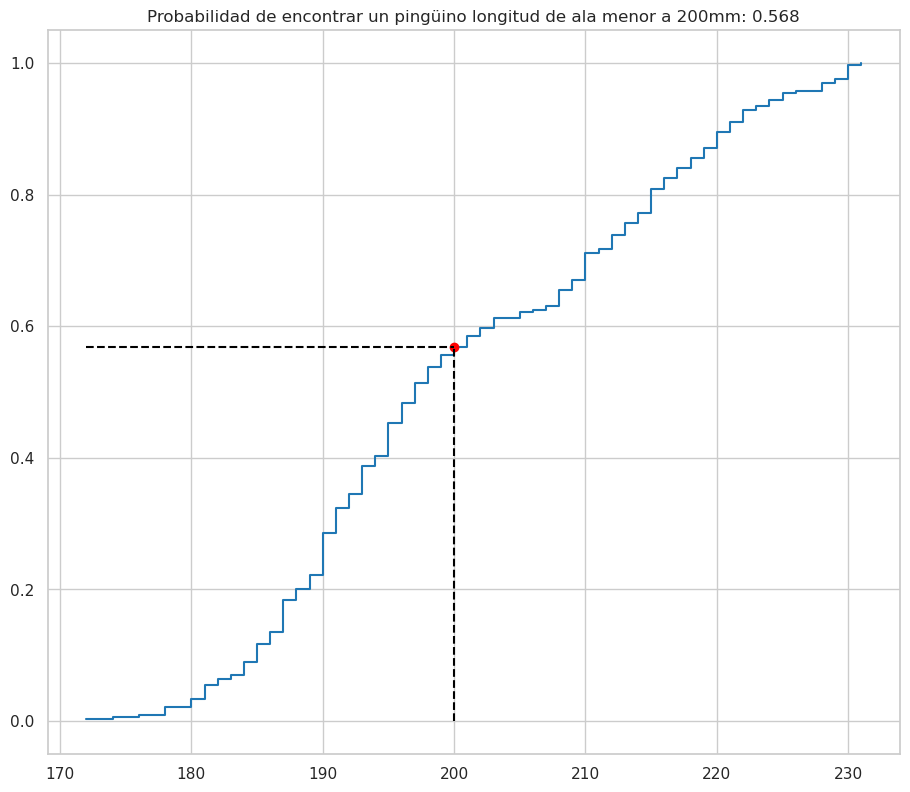

In [47]:
cdf_flipper_length_mm.step()

q = 200 # Cantidad 200 mm
p = cdf_flipper_length_mm(q) # Probabilidad

plt.plot(q, p, "ro") # intersección de la probabilidad con la logitud de ala 

# Líneas guía
plt.vlines(
  x=q,
  ymin=0,
  ymax=p,
  color="black",
  linestyle="dashed"
)
plt.hlines(
  y=p,
  xmin=pmf_flipper_length_mm.qs[0], # Empieza desde el valor mínimo de la variable flipper length
  xmax=q,
  color="black",
  linestyle="dashed"
)

plt.title(f"Probabilidad de encontrar un pingüino longitud de ala menor a {q}mm: {p.round(3)}")

plt.show()

Dada una o más probabilidades especificas, ¿Qué longitud de ala tendría un pingüino? <br>
Para este ejemplo buscaremos las longitudes que esten dentro del IQR ($25\%$ al $27\%$ )

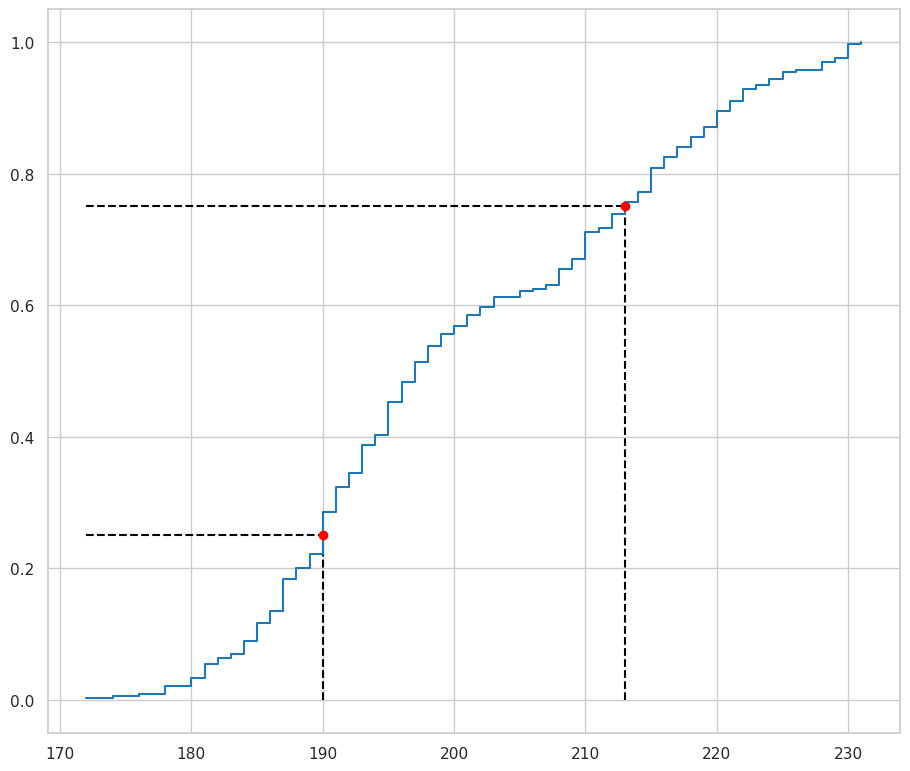

In [48]:
# Probabilidades especificas
p_1, p_2 = 0.25, 0.75

ps = (p_1, p_2) # IQR
qs = cdf_flipper_length_mm.inverse(ps) # Regresa la cantidad en lugar la probabilidad

# Graficamos
cdf_flipper_length_mm.step()

plt.scatter(
  x=qs,
  y=ps,
  color="red",
  zorder=2 # Al frente de la grafica.
)

plt.vlines(
  x=qs,
  ymin=0,
  ymax=ps,
  color="black",
  linestyle="dashed",
  zorder=1
)

plt.hlines(
  y=ps,
  xmin=pmf_flipper_length_mm.qs[0],
  xmax=qs,
  color="black",
  linestyle="dashed",
  zorder=1
)

plt.show()

Función de densidad acumulada comparando la longitud del ala de las tres distintas especies de pingüinos.

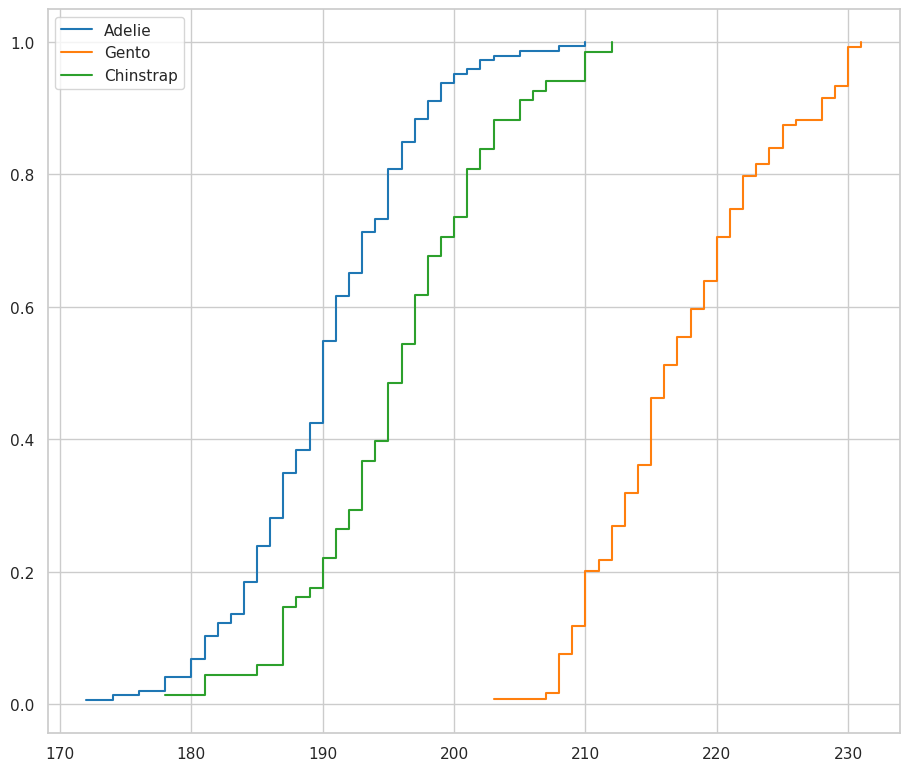

In [49]:
cdf_adelie = empiricaldist.Cdf.from_seq(processed_penguins_df[processed_penguins_df["species"] == "Adelie"]["flipper_length_mm"])
cdf_gentoo = empiricaldist.Cdf.from_seq(processed_penguins_df[processed_penguins_df["species"] == "Gentoo"]["flipper_length_mm"])
cdf_chinstrap = empiricaldist.Cdf.from_seq(processed_penguins_df[processed_penguins_df["species"] == "Chinstrap"]["flipper_length_mm"])

cdf_adelie.step(legend=True, label="Adelie")
cdf_gentoo.step(legend=True, label="Gento")
cdf_chinstrap.step(legend=True, label="Chinstrap")

### Función de densidad de probabilidad (PDF)

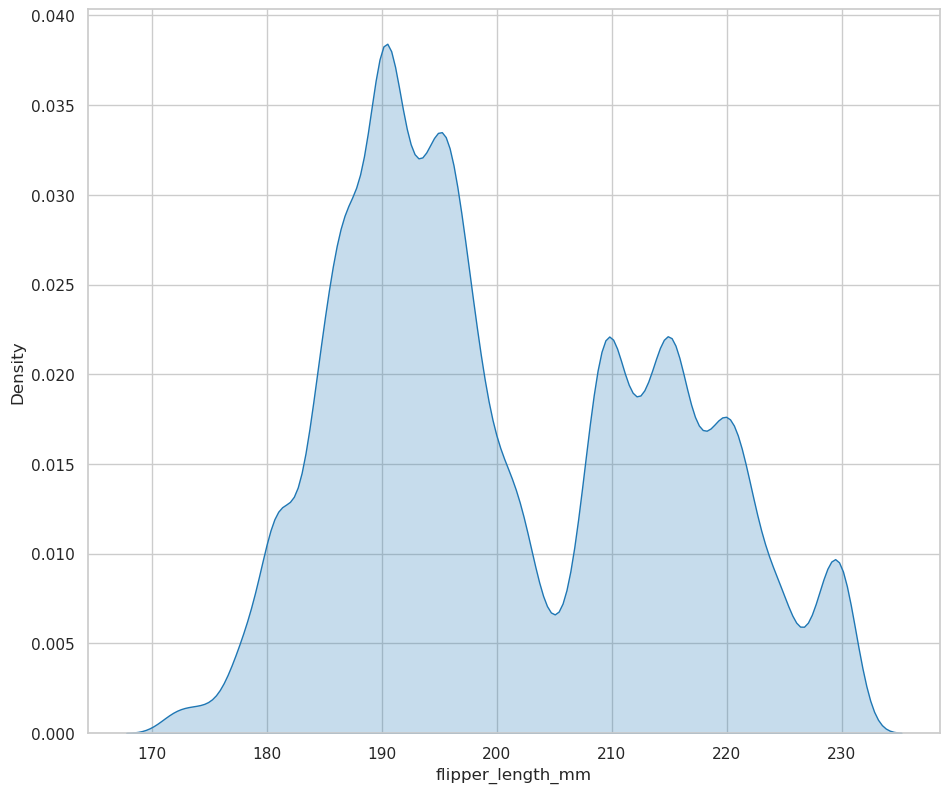

In [50]:
sns.kdeplot(
  data=processed_penguins_df,
  x="flipper_length_mm",
  fill=True,
  # hue="species",
  bw_method=0.1 # bandwidth
)

plt.show()

In [51]:
stats = processed_penguins_df["body_mass_g"].describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

Comparación entre las funciones de distribución acumulada real de la variable `body_mass_g` vs como sería si de forma aleatoria los datos siguieran una distribución normal.

Donde:
- La distribucuón **empírica** corresponde a la función de distribución acumulada utilizando los datos del dataset (muestra).
- La distribución **teórica** corresponde a la función de distribución acumulada utilizando datos aleatorios contenidos en el rango de la variable, donde la media y desviasión estandar corresponden a las del dataset.

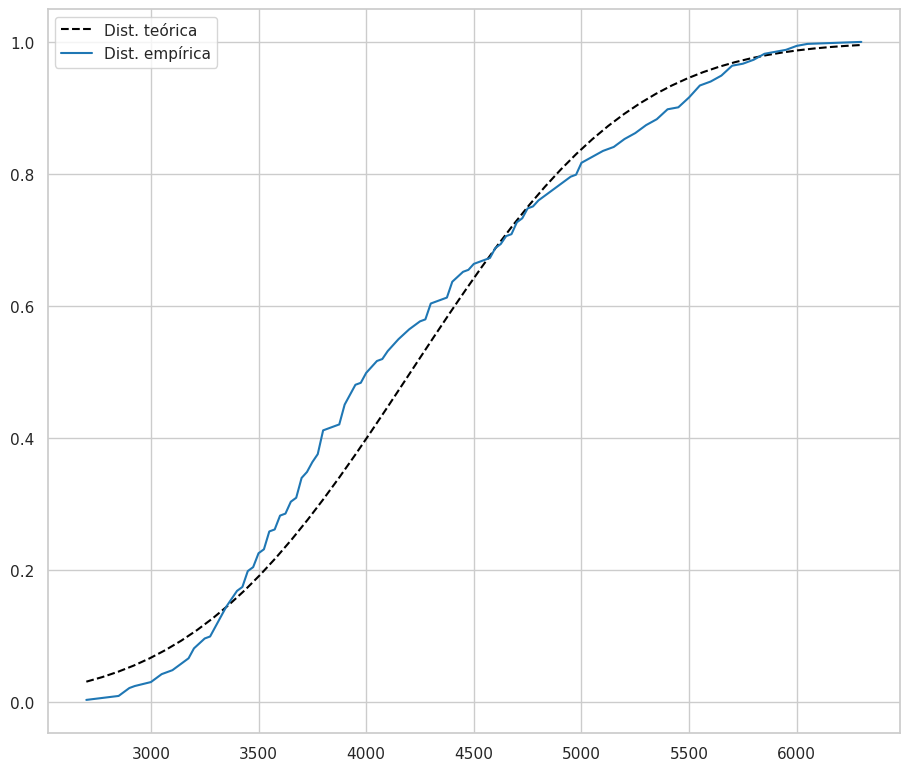

In [52]:
# Generamos datos aleatorios desde el valor mínimo al máximo de los datos
xs = np.linspace(stats["min"], stats["max"])
# Genreramos las probabilidades dada una distribución teórica con una media y desviasión estandas que tenemos en los datos reales.
# Dada la media y la desviasión estándar, cual es la probabilidad de obtener los valores contenidos en xs.
ys = scipy.stats.norm(stats["mean"], stats["std"]).cdf(xs)

# Comparación visual
plt.plot(xs, ys, color="black", linestyle="dashed", label="Dist. teórica")
plt.legend()

empiricaldist.Cdf.from_seq(
  processed_penguins_df["body_mass_g"],
  normalize=True
).plot(legend=True, label="Dist. empírica")

plt.show()

Comparación entre las funciones de densidad de probabilidad de la distribución empírica versus la distribución teórica de la variable `body_mass_g`.

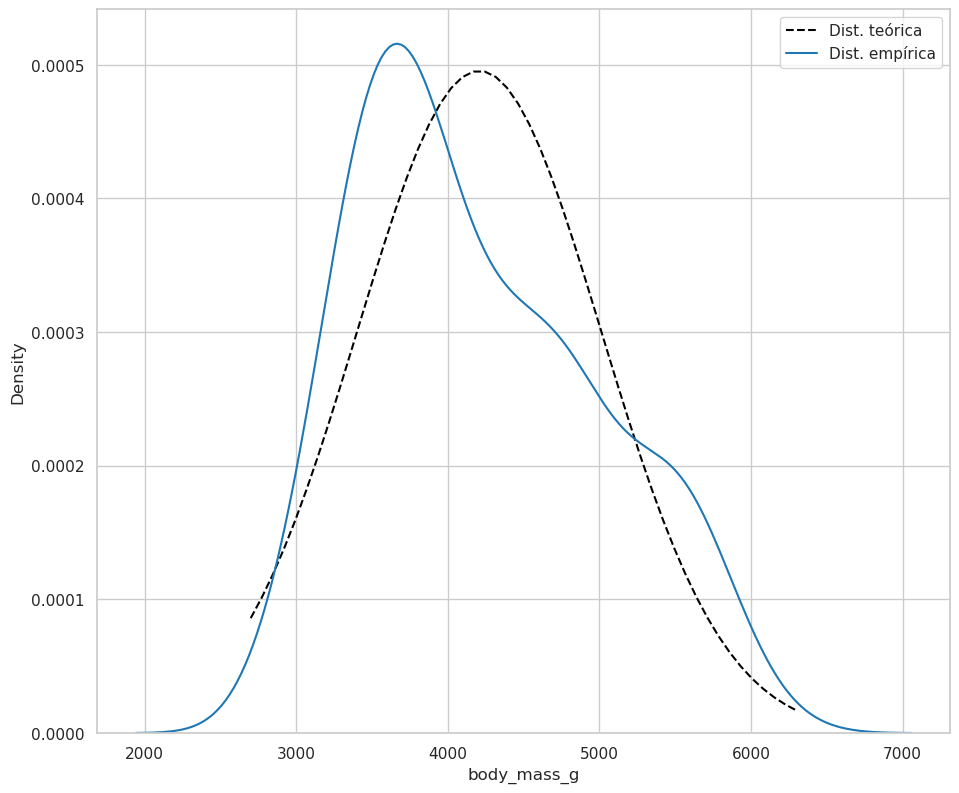

In [53]:
# Generamos datos aleatorios desde el valor mínimo al máximo de los datos
xs = np.linspace(stats["min"], stats["max"])
# Genreramos las probabilidades dada una distribución teórica con una media y desviasión estandas que tenemos en los datos reales.
# Dada la media y la desviasión estándar, cual es la densidad de probabilidad de obtener los valores contenidos en xs.
ys = scipy.stats.norm(stats["mean"], stats["std"]).pdf(xs)

# Comparación visual
plt.plot(xs, ys, color="black", linestyle="dashed", label="Dist. teórica")

sns.kdeplot(
  data=processed_penguins_df,
  x="body_mass_g",
  label="Dist. empírica"
)

plt.legend()
plt.show()

Comparación entre la función de densidad de probabilidad de la distribución empírica versus la distribución teórica de las características de todos los pingüinos.

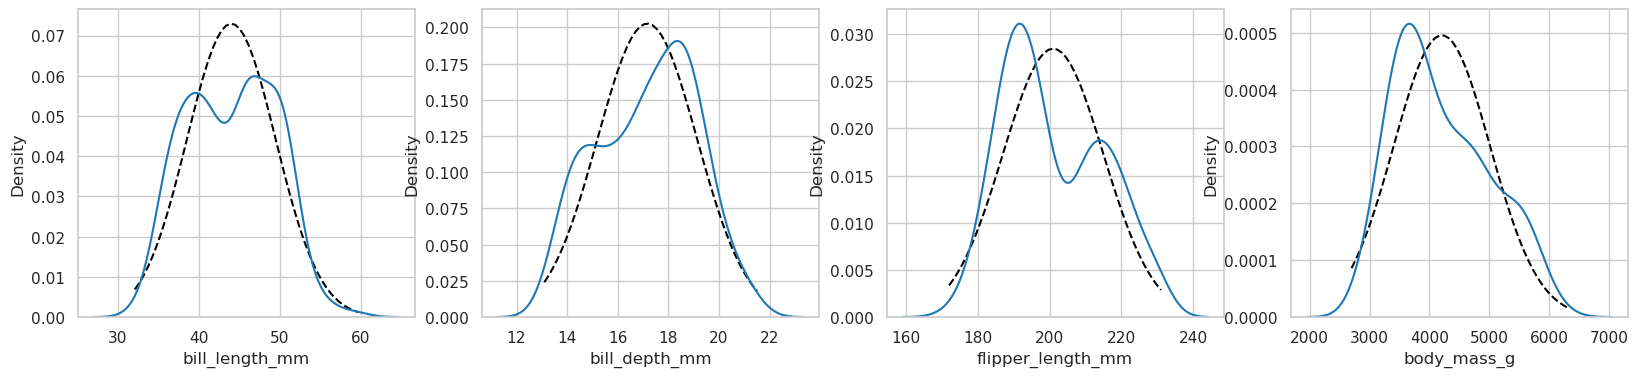

In [54]:
variables = processed_penguins_df.describe(include=np.number).columns
ncols = len(variables)

fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(20,4))

for i in range(ncols):
  var = variables[i]
  stats = processed_penguins_df[var].describe()

  # Generamos datos aleatorios desde el valor mínimo al máximo de los datos
  xs = np.linspace(stats["min"], stats["max"])
  # Genreramos las probabilidades para una dsitribución teórica con una media y desviasión estandas que tenemos en los datos reales.
  # Dada la media y la desviasión estándar, cual es la densidad de probabilidad de obtener los valores aleatorios(xs).
  ys = scipy.stats.norm(stats["mean"], stats["std"]).pdf(xs)

  # Comparación visual
  axes[i].plot(xs, ys, color="black", linestyle="dashed", label="Dist. teórica")


  sns.kdeplot(
    data=processed_penguins_df,
    x=var,
    label="Dist. empírica",
    ax=axes[i]
  )

Al analizar de forma general las variables podemos observar un notable sesgo en cada una al comprarlas contra una distribución teórica (normal).

Pero, ¿Qué pasa si hacemos una comparación entre la distribución de probabilidad empírica de las características de cada especie de pingüino vs una distribución teórica con valores aleatorios contenidos dentro del rango de la variable por cada especie.

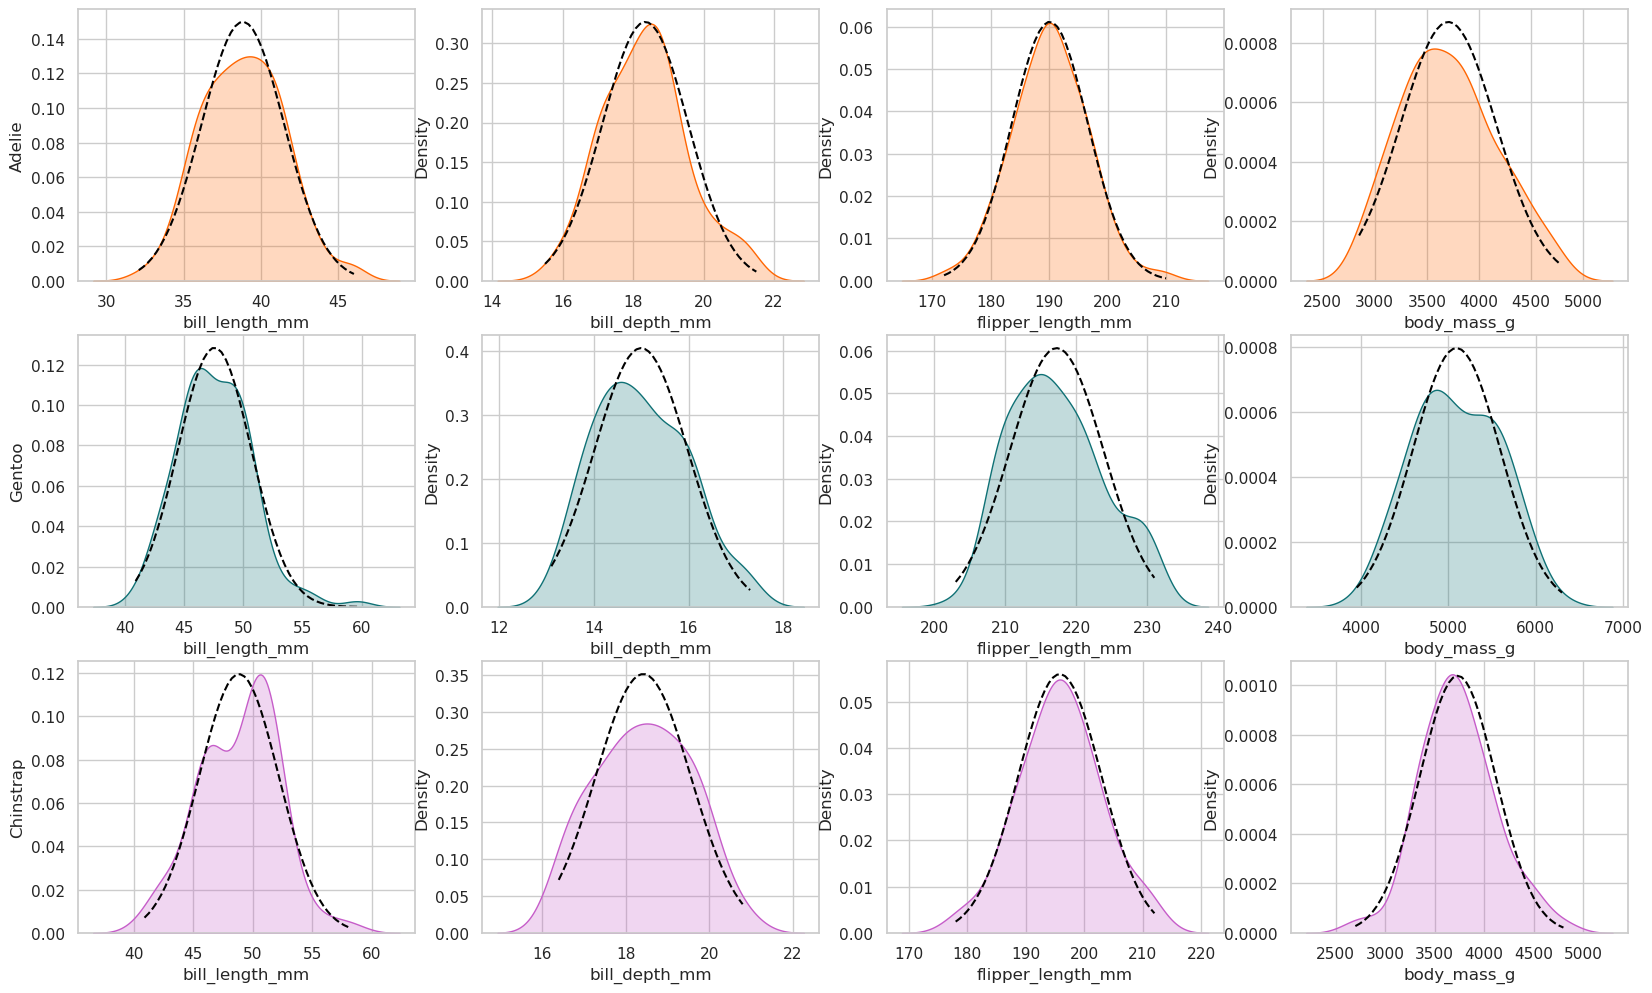

In [55]:
species = processed_penguins_df["species"].unique()
variables = processed_penguins_df.describe(include=np.number).columns
colors = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
  }

nrows = len(species)
ncols = len(variables)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 12))

for i in range(nrows):
  specie = species[i]
  axes[i][0].set_ylabel(specie)
  for j in range(ncols):
    var = variables[j]
    by_species_df = processed_penguins_df[processed_penguins_df["species"] == specie]
    stats = by_species_df[var].describe()

    # Distribución teórica dados valores aleatorios contenidos en el rango de la variable.
    xs = np.linspace(stats["min"], stats["max"])
    ys = scipy.stats.norm(stats["mean"], stats["std"]).pdf(xs)

    axes[i][j].plot(xs, ys, color="black", linestyle="dashed", label="Dist. normal")
    
    # Distribución empírica de la variable
    sns.kdeplot(
      data=by_species_df,
      x=var,
      label="Dist. real",
      ax=axes[i][j],
      fill=True,
      color=colors[specie]
    )

Al analizar cada variable segmendada por especie de pingüinos observamos que su distribución se asemeja a una distribución normal.

## Teorema del límite central

Comprobación del teorema a partir de una distribución binomial que obtenemos de la variable `sex` del dataset.

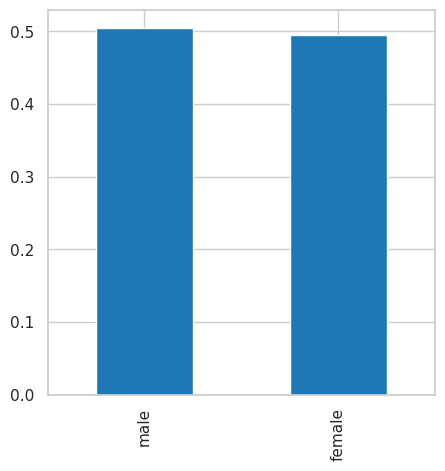

male      0.504505
female    0.495495
Name: sex, dtype: float64


In [56]:
processed_penguins_df["sex"].value_counts(normalize=True).plot(kind="bar", figsize=(5,5))
# normalize=True: Muestra la proporción
plt.show()
print(processed_penguins_df["sex"].value_counts(normalize=True))

Transformamos los valores `male` y `female` a valores numéricos.
Donde:
- `0`: Male
- `1`: Female

In [57]:
sex_numeric = processed_penguins_df["sex"].replace(["male", "female"], [0, 1])

In [58]:
number_samples = 1000
sample_size = 35

samples_df = pd.DataFrame()

np.random.seed(42)
for i in range(1, number_samples + 1):
  sex_numeric_samples = sex_numeric.sample(sample_size, replace=True).to_numpy()
  sample_name = f"sample_{i}"
  samples_df[sample_name] = sex_numeric_samples

female_population_mean = samples_df.mean().mean()
print(f"Procentaje estimado de pingüinos hembra en la población: {female_population_mean * 100:.4f}%")

/home/pahoalapizco/anaconda3/envs/eda_penguins/lib/python3.7/site-packages/ipykernel_launcher.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # Remove the CWD from sys.path while we load stuff.


Procentaje estimado de pingüinos hembra en la población: 49.8171%


Distribucuón de las muestras obtenidas:

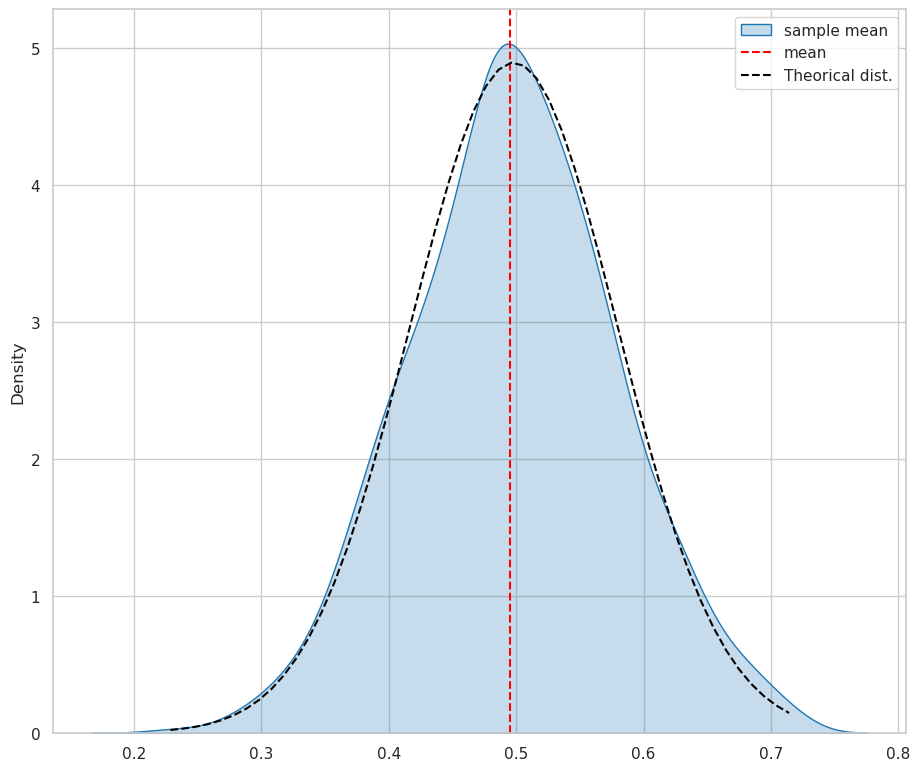

In [59]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=["sample_mean"])
sns.kdeplot(data=sample_means_binomial, label="sample mean", fill=True)
plt.axvline(x=sex_numeric.mean(), color="red", linestyle="dashed", label="mean")

# Comparación con la distribución teórica
xs = np.linspace(sample_means_binomial.min(), sample_means_binomial.max())
ys = scipy.stats.norm(sample_means_binomial.mean(), sample_means_binomial.std()).pdf(xs)
plt.plot(xs, ys, color="black", linestyle="dashed", label="Theorical dist.")

plt.legend()
plt.show()

In [60]:
sample_size_experiment = pd.DataFrame(
  [[i, samples_df.iloc[:, 0:i].mean().mean()] for i in range(1, number_samples + 1)],
  columns=["sample_size", "estimated_mean"]
)

In [61]:
sample_size_experiment.head()

sample_size  estimated_mean
0            1        0.542857
1            2        0.585714
2            3        0.600000
3            4        0.557143
4            5        0.554286

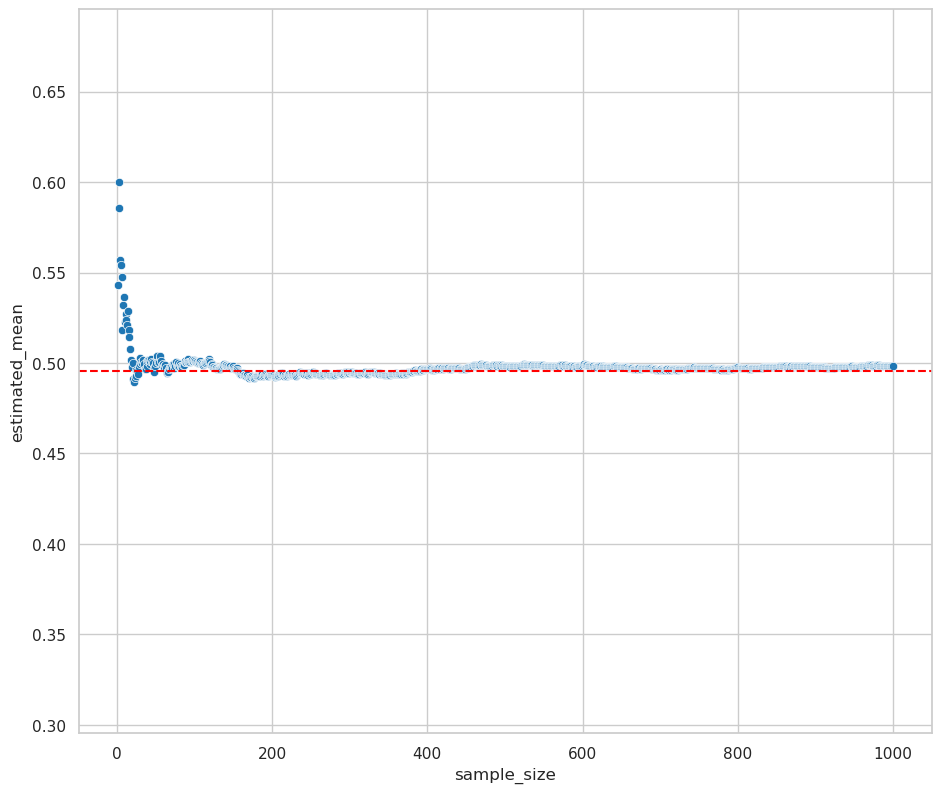

In [62]:
sns.scatterplot(
  data=sample_size_experiment,
  x="sample_size",
  y="estimated_mean"
)

plt.axhline(
  y=sex_numeric.mean(),
  color="red",
  linestyle="dashed"
)

plt.ylim([sex_numeric.mean() - 0.2, sex_numeric.mean() + 0.2])
plt.show()

En esté último gráfico podemos observar con mayor claridad, como a medida que incrementamos el número de muestras, la media de las muestras se acerca a la media real de los datos analizados, en este caso el `sexo` de los pingüinos, para este ejemplo es la media de encontrar un pingüino hembra en nuestros datos.

## Análisis bivariado

#### **`bill length` - `bill depth`**

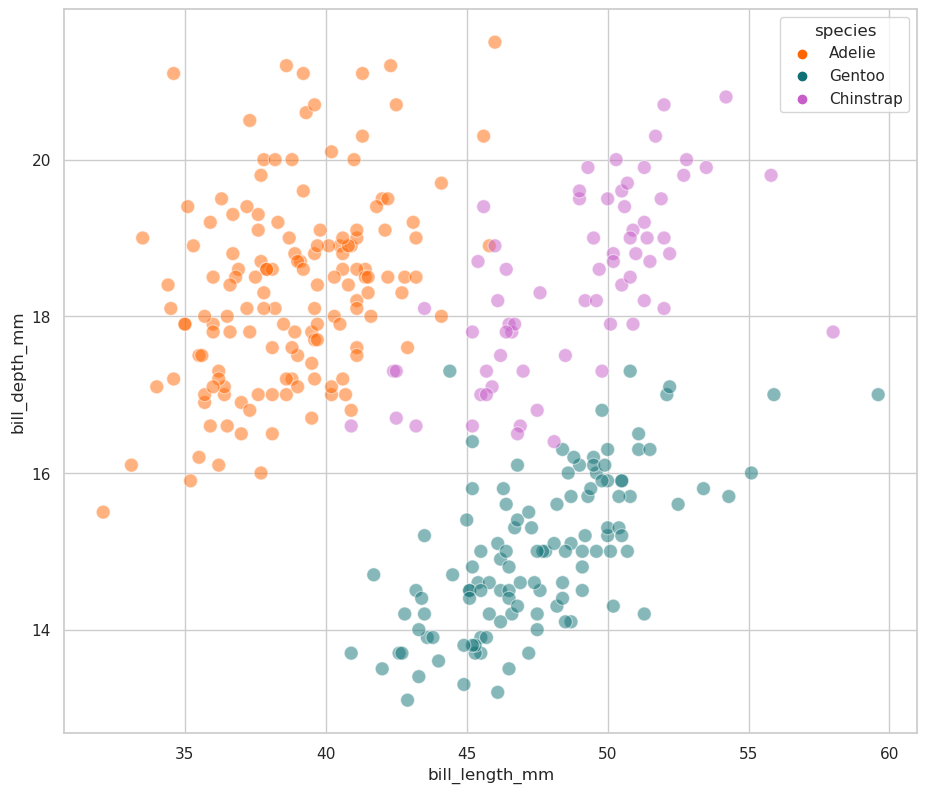

In [63]:
sns.scatterplot(
  data=processed_penguins_df,
  x="bill_length_mm",
  y="bill_depth_mm",
  alpha=.5,
  s=100,
  hue="species",
  palette=penguin_color
)

plt.show()

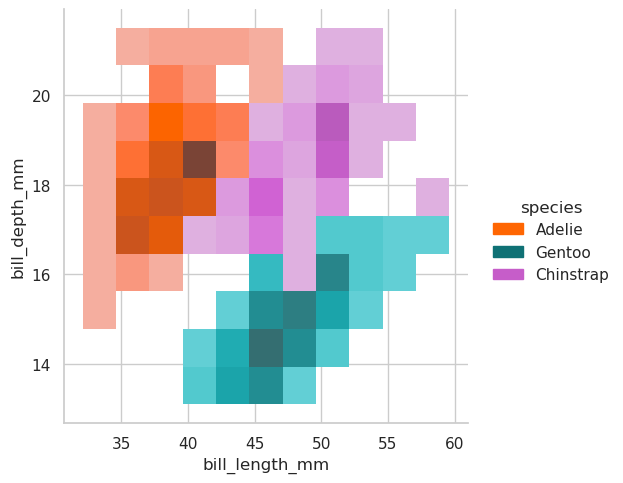

In [64]:
sns.displot(
  data=processed_penguins_df,
  x="bill_length_mm",
  y="bill_depth_mm",
  hue="species",
  palette=penguin_color
)

plt.show()

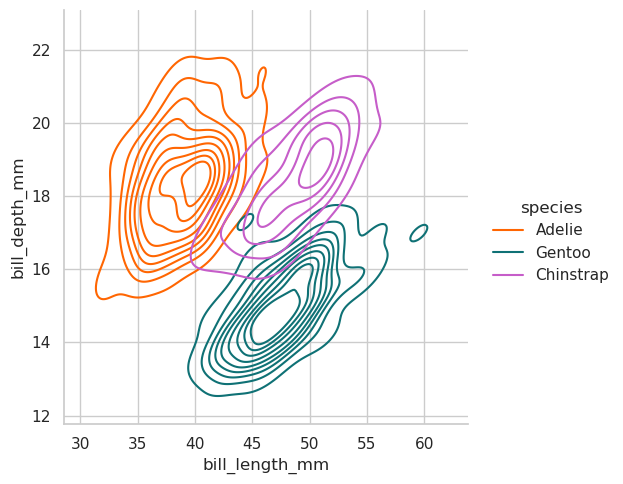

In [65]:
sns.displot(
  data=processed_penguins_df,
  x="bill_length_mm",
  y="bill_depth_mm",
  hue="species",
  kind="kde",
  palette=penguin_color
)

plt.show()

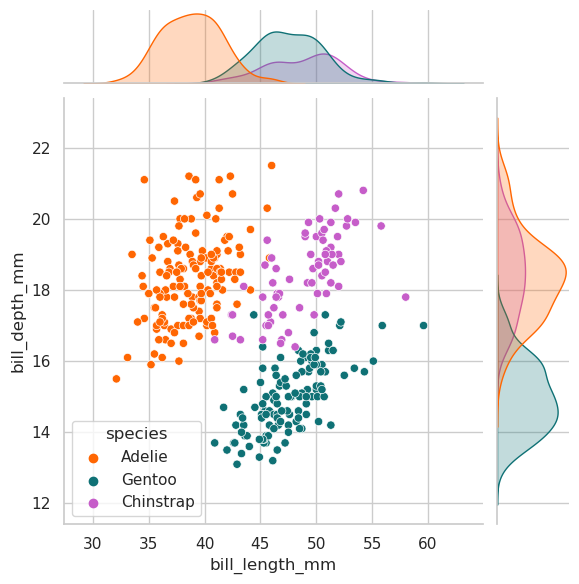

In [66]:
sns.jointplot(
  data=processed_penguins_df,
  x="bill_length_mm",
  y="bill_depth_mm",
  hue="species",
  palette=penguin_color
)


#### **`flipper_length_mm` - `species`**

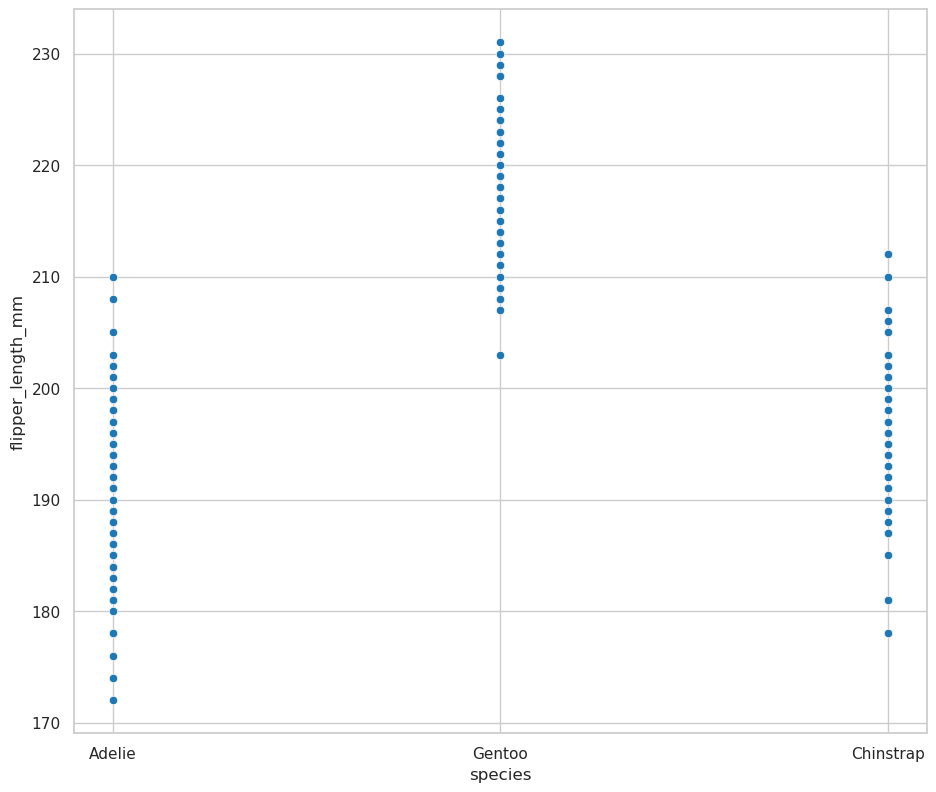

In [67]:
sns.scatterplot(
  data=processed_penguins_df,
  x="species",
  y="flipper_length_mm"
)
plt.show()

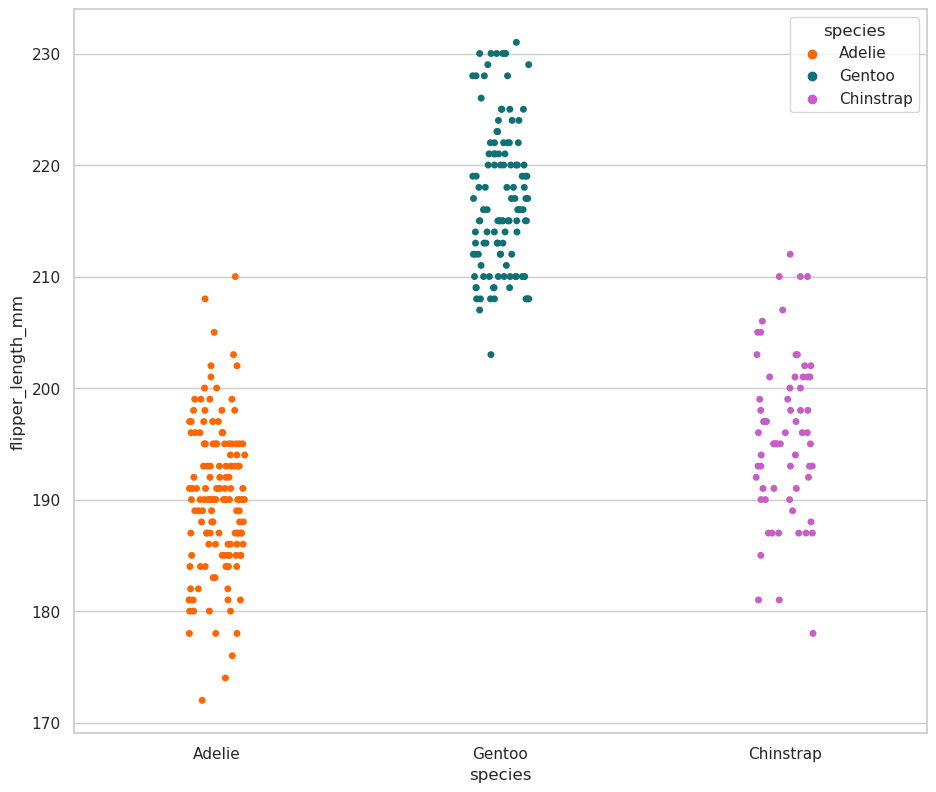

In [68]:
sns.stripplot(
  data=processed_penguins_df,
  x="species",
  y="flipper_length_mm",
  hue="species",
  palette=penguin_color
)
plt.show()

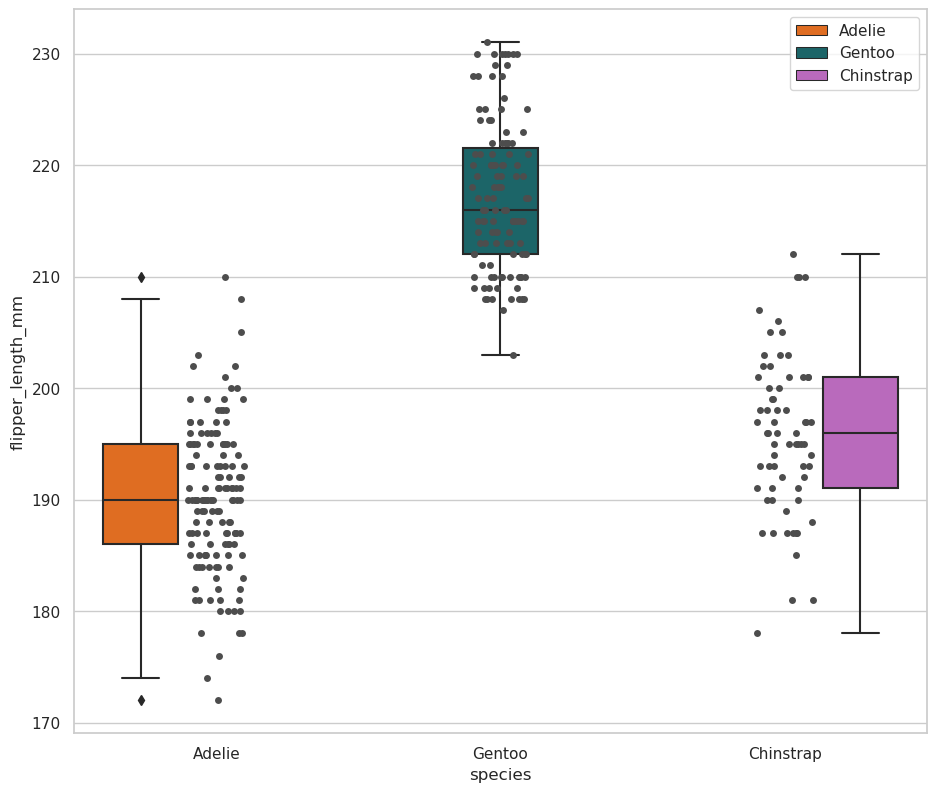

In [69]:
sns.boxplot(
  data=processed_penguins_df,
  x="species",
  y="flipper_length_mm",
  hue="species",
  palette=penguin_color
)

sns.stripplot(
  data=processed_penguins_df,
  x="species",
  y="flipper_length_mm",
  color=".3"
)

plt.show()

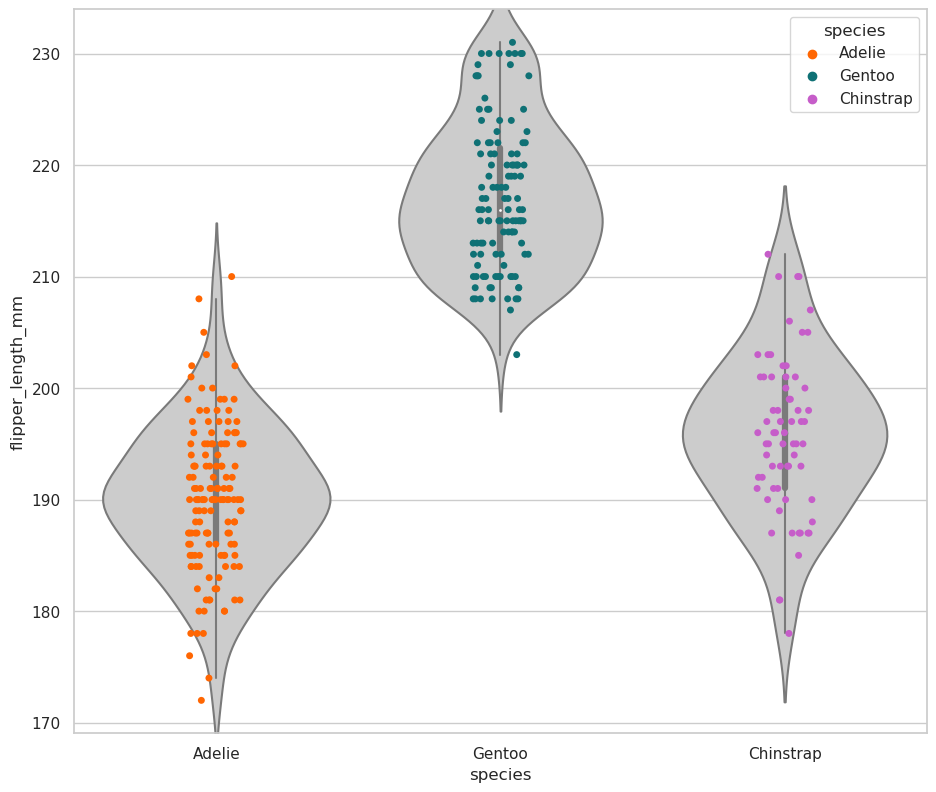

In [70]:
sns.violinplot(
  data=processed_penguins_df,
  x="species",
  y="flipper_length_mm",
  color=".8"
)

sns.stripplot(
  data=processed_penguins_df,
  x="species",
  y="flipper_length_mm",
  hue="species",
  palette=penguin_color
)

plt.show()

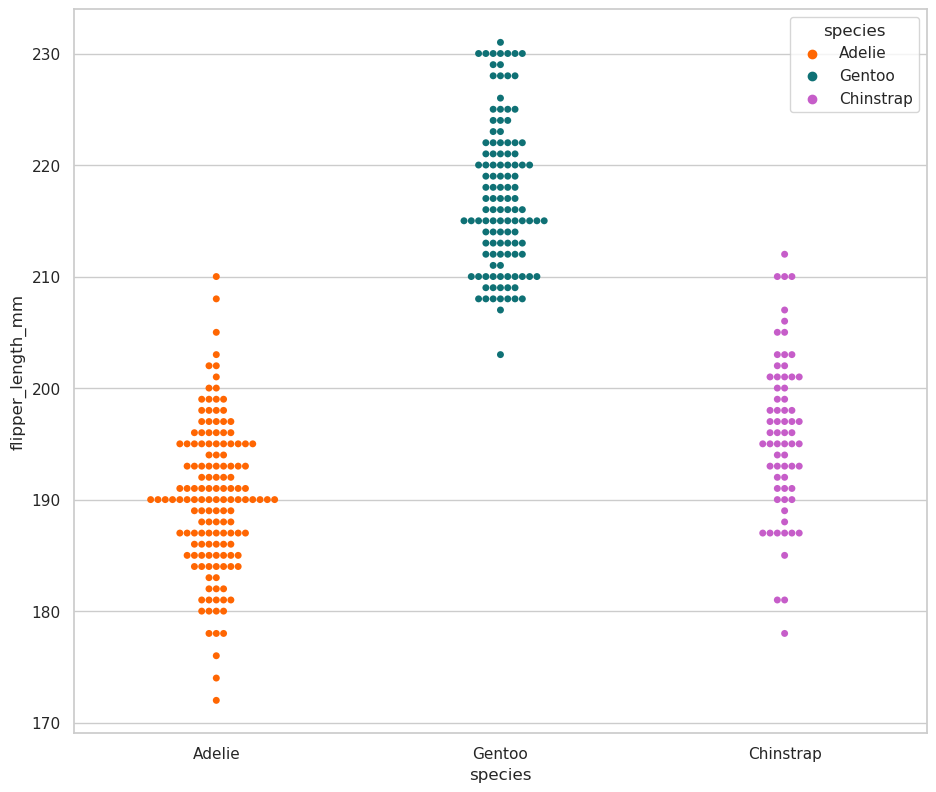

In [71]:
sns.swarmplot(
  data=processed_penguins_df,
  x="species",
  y="flipper_length_mm",
  hue="species",
  palette=penguin_color
)
plt.show()

### Coeficiente de correlación lineal

In [72]:
processed_penguins_df.corr().style.highlight_between(left=0.5, right=0.99, color="lightblue")

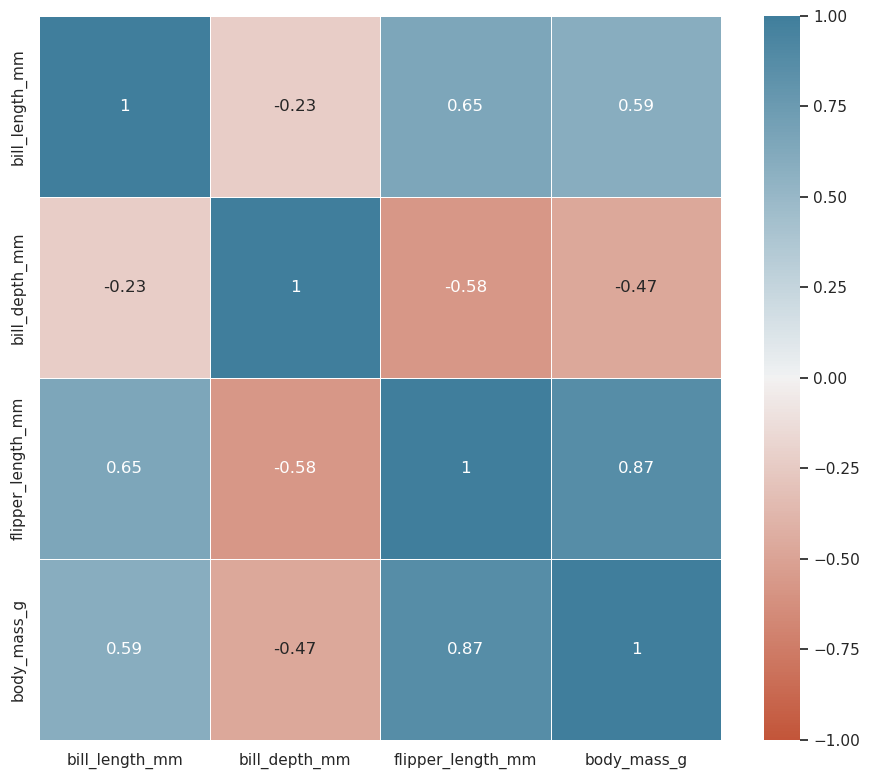

In [73]:
sns.heatmap(
  data=processed_penguins_df.corr(),
  cmap=sns.diverging_palette(20, 230, as_cmap=True),
  center=0,
  vmin=-1,
  vmax=1,
  linewidths=0.5,
  annot=True
)
plt.show()

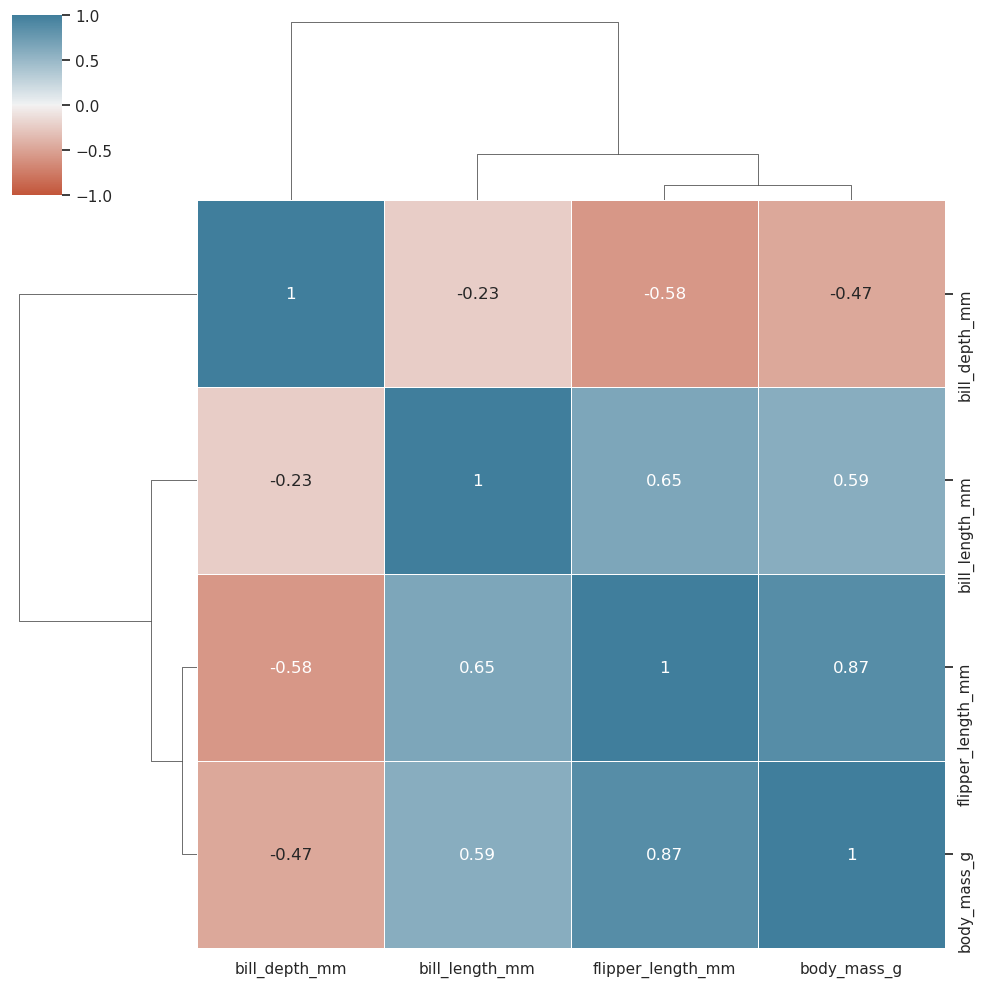

In [74]:
sns.clustermap(
  data=processed_penguins_df.corr(),
  cmap=sns.diverging_palette(20, 230, as_cmap=True),
  center=0,
  vmin=-1,
  vmax=1,
  linewidths=0.5,
  annot=True
)
plt.show()

In [75]:
processed_penguins_df = (
  processed_penguins_df
  .assign(
    numeric_sex = lambda df: df["sex"].replace(["male", "female"], [0, 1])
  )
)

processed_penguins_df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  numeric_sex  
0       3750.0    male            0  
1       3800.0  female            1  
2       3250.0  female            1  
4       3450.0  female            1  
5       3650.0    male            0

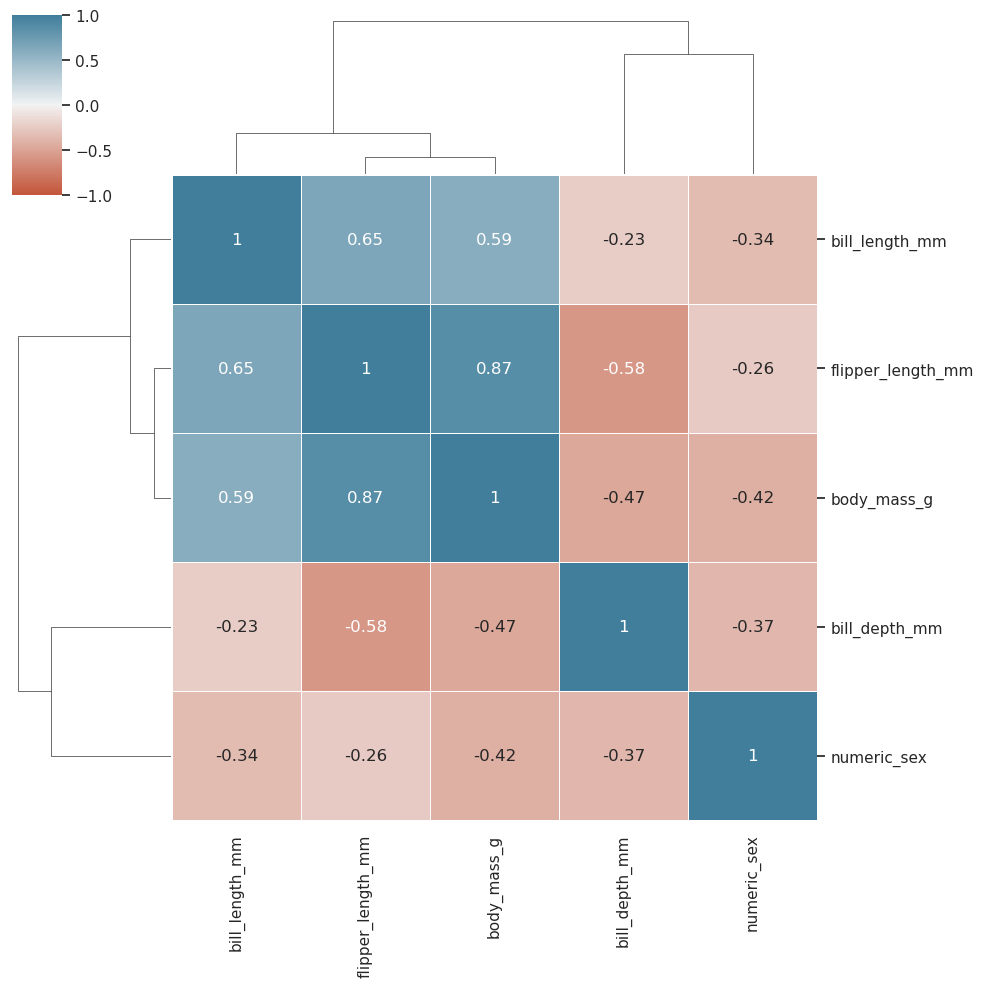

In [76]:
sns.clustermap(
  data=processed_penguins_df.corr(),
  cmap=sns.diverging_palette(20, 230, as_cmap=True),
  center=0,
  vmin=-1,
  vmax=1,
  linewidths=0.5,
  annot=True
)
plt.show()

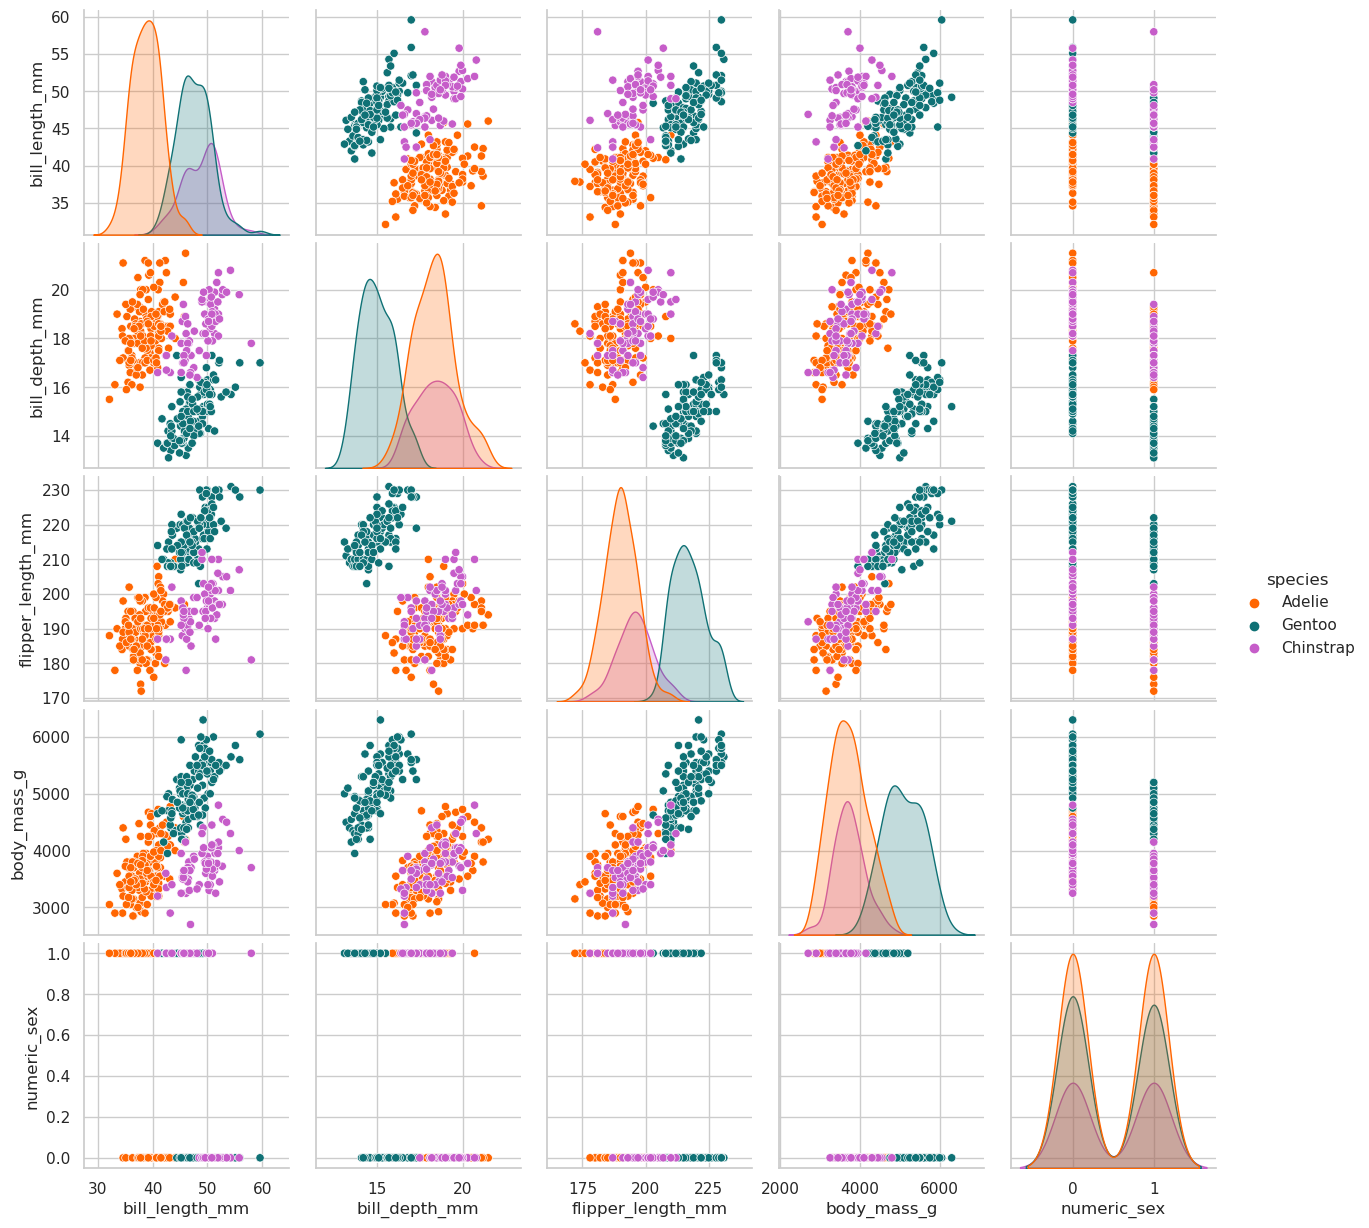

In [77]:
sns.pairplot(data=processed_penguins_df, hue="species", palette=penguin_color)
plt.show()

### Regresión lineal simple

#### **`bill_length_mm` - `bill_depth_mm`**

**Línea de regresión lineal manual**

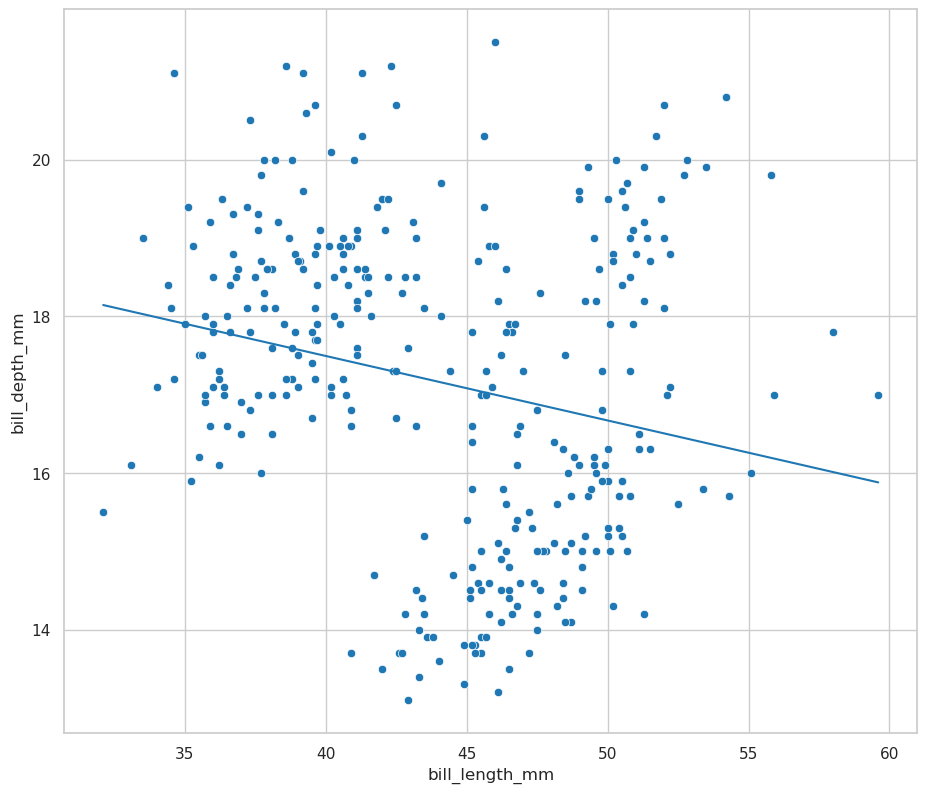

In [78]:
reg_all = scipy.stats.linregress(x=processed_penguins_df["bill_length_mm"], y=processed_penguins_df["bill_depth_mm"])

x_line_all = np.array([processed_penguins_df["bill_length_mm"].min(), processed_penguins_df["bill_length_mm"].max()])
y_line_all = reg_all.intercept + reg_all.slope * x_line_all

sns.scatterplot(
  data=processed_penguins_df,
  x="bill_length_mm",
  y="bill_depth_mm"
)

plt.plot(x_line_all, y_line_all)
plt.show()

**Con seaborn**

separando por especies

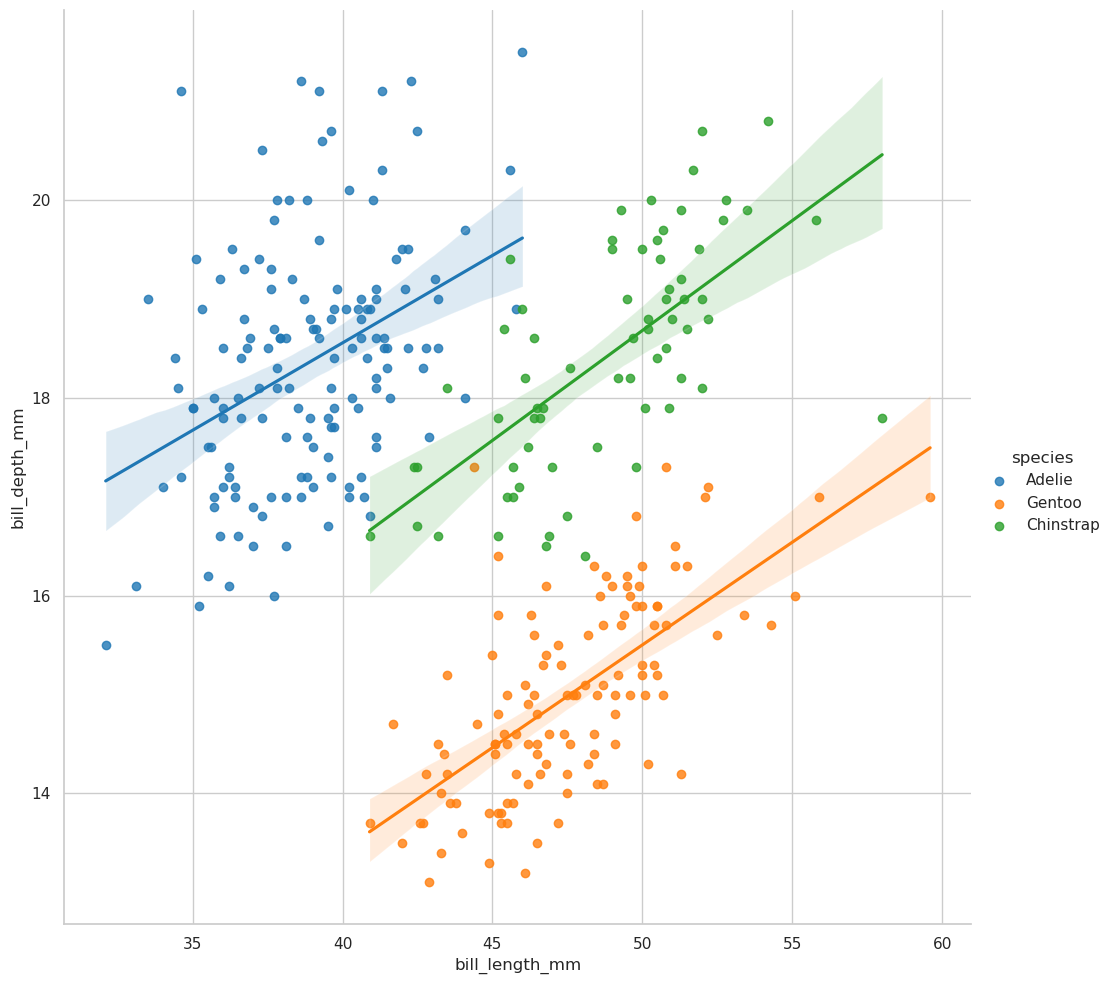

In [79]:
sns.lmplot(
  data=processed_penguins_df,
  x="bill_length_mm",
  y="bill_depth_mm",
  hue="species",
  height=10
)

**Limitaciones de la regresión líeal simple**

- No es simetrica, por lo tanto no es lo mismo comparar `x - y` que `y - x`. 
- Si dos variables crecen o decrecen siguiendo las mismas pautas, no necesariamente una cause la otra. _Correlación no implica causalidad_.

Es impresindible identificar correctamente las variable independiente de la variable objetivo/dependiente para concluir un buen análisis de regresión.


**Comprobación de asimetria:**

Rel. x - y:  LinregressResult(slope=0.25482471848215255, intercept=-7.21855798877661, rvalue=0.6530956386670862, pvalue=7.211340708096522e-42, stderr=0.016240696205560887, intercept_stderr=3.2717475483081753)
Rel. y - x:  LinregressResult(slope=1.6738325692522753, intercept=127.33039757802362, rvalue=0.6530956386670862, pvalue=7.211340708096522e-42, stderr=0.10667805862053212, intercept_stderr=4.729078577188444)


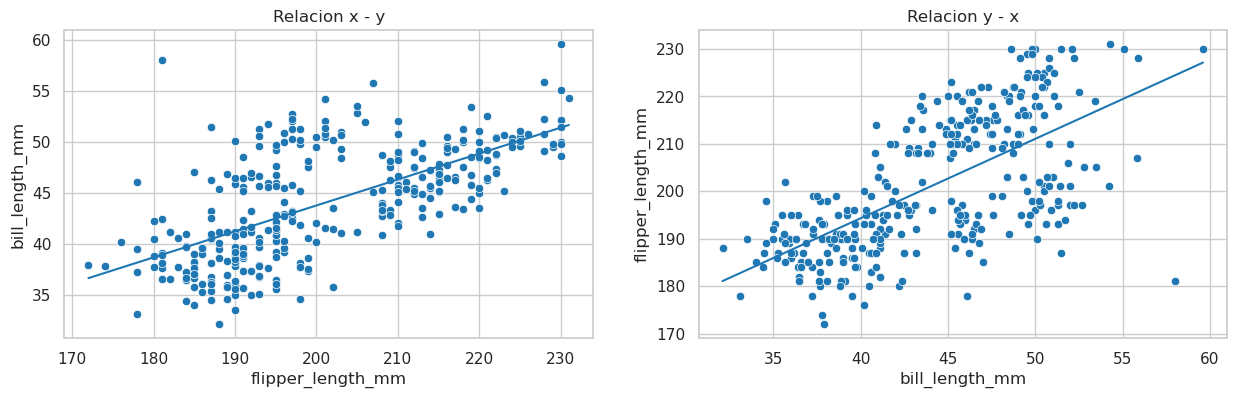

In [80]:
# Todo el data set de pinguinos
x = processed_penguins_df["flipper_length_mm"]
y = processed_penguins_df["bill_length_mm"]

# Lineas de regresión
lin_x_y = scipy.stats.linregress(x=x, y=y)
lin_y_x = scipy.stats.linregress(x=y, y=x)
print(f"Rel. x - y: ", lin_x_y)
print(f"Rel. y - x: ", lin_y_x)

# Relación x - y
fx_1 = np.array([x.min(), x.max()])
fy_1 = lin_x_y.intercept + lin_x_y.slope * fx_1

# Relación y - x
fx_2 = np.array([y.min(), y.max()])
fy_2 = lin_y_x.intercept + lin_y_x.slope * fx_2


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

sns.scatterplot(
  x=x,
  y=y,
  ax=axes[0]
)
axes[0].plot(fx_1, fy_1)
axes[0].set_title("Relacion x - y")

sns.scatterplot(
  x=y,
  y=x,
  ax=axes[1]
)
axes[1].plot(fx_2, fy_2)
axes[1].set_title("Relacion y - x")

plt.show()

Gráfica de ambas líneas tanto en la relación `x - y` como en `y - x`:

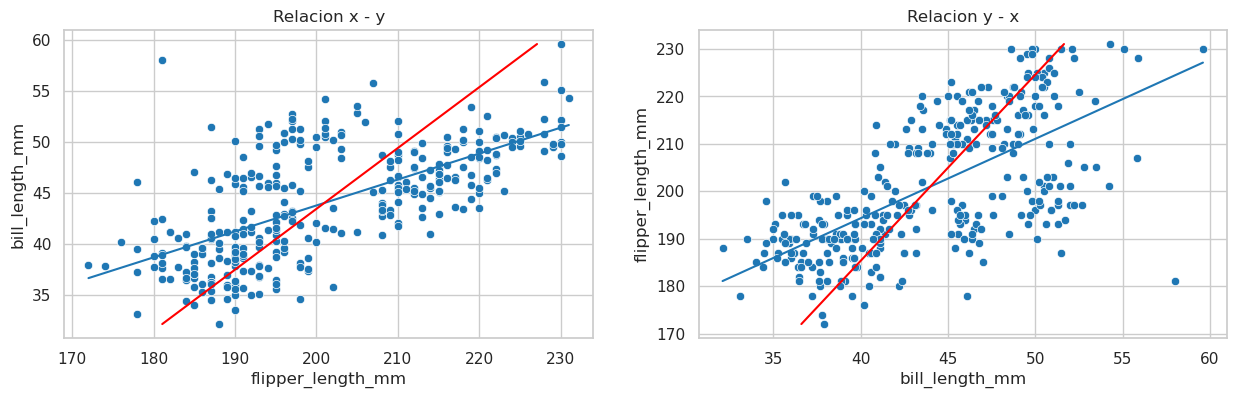

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

sns.scatterplot(
  x=x,
  y=y,
  ax=axes[0]
)
axes[0].plot(fx_1, fy_1)
axes[0].plot(fy_2, fx_2, color="red")
axes[0].set_title("Relacion x - y")

sns.scatterplot(
  x=y,
  y=x,
  ax=axes[1]
)
axes[1].plot(fx_2, fy_2)
axes[1].plot(fy_1, fx_1, color="red")
axes[1].set_title("Relacion y - x")

plt.show()

Con la regresión simple no podemos saber nada sobre la **causalidad**, pero podemos utilizar herramientas para separar las relaciones entre variables. Una de ellas es es la funcion `OLS` (Ordinary Least Squares) de la librería `statsmodels`, es parte del modelo de regresión lineal.

In [82]:
(
  smf.ols(
    #formula="y ~ x"
    formula="bill_length_mm ~ flipper_length_mm",
    data=processed_penguins_df
  )
  .fit()
  .params
)


Intercept           -7.218558
flipper_length_mm    0.254825
dtype: float64

_Comportamiento de el largo del pico respecto al largo del ala en mm_: Por cada milimetro (unidad) del largo del ala; el pico decrece en $0.254825$.

In [83]:
(
  smf.ols(
    #formula="y ~ x"
    formula="flipper_length_mm ~ bill_length_mm",
    data=processed_penguins_df
  )
  .fit()
  .params
)

Intercept         127.330398
bill_length_mm      1.673833
dtype: float64

_Comportamiento de el largo del ala respecto al largo del pico en mm_: Por cada milimetro (unidad) del largo del pico; el ala crece en $1.673833$.

## Análisis multivariado

### Regresión lineal multiple

Técnica estadística utilizada para modelar la relación entre **una** variable **dependiente** y **dos o más** variables **independientes**.


¿Cuál es la mejor forma de capturar el peso de un pingüino sino contamos con una báscula para obtener ese dato?; Suponiendo que se esta en campo haciendo la captura de la muestra de pingüinos en la Antártica.

**Modelo 1:** Dos variables

Donde:
- Variable dependiente: `body_mass_g`
- Variable independiente: `bill_length_mm`

In [84]:
model_1 = (
  smf.ols(
    formula="body_mass_g ~ bill_length_mm",
    data=processed_penguins_df
  ).fit()
)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           1.54e-32
Time:                        15:08:34   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Modelo 2:** Tres variables
Donde:
- Variable dependiente: `body_mass_g`
- Variables independientes: `bill_length_mm`, `bill_depth_mm`

In [85]:
model_2 = (
  smf.ols(
    formula="body_mass_g ~ bill_length_mm + bill_depth_mm",
    data=processed_penguins_df
  ).fit()
)
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           7.04e-46
Time:                        15:08:34   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Modelo 3:** Cuatro variables
Donde:
- Variable dependiente: `body_mass_g`
- Variables independientes: `bill_length_mm`, `bill_depth_mm` y `flipper_length_mm`

In [86]:
model_3 = (
  smf.ols(
    formula="body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm",
    data=processed_penguins_df
  ).fit()
)
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Thu, 04 Apr 2024   Prob (F-statistic):          9.26e-103
Time:                        15:08:34   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Modelo 4:** Cinco variables, una categórica

Donde:
- Variable dependiente: `body_mass_g`
- Variables independientes: `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm` y `sex`

In [87]:
model_4 = (
  smf.ols(
    formula="body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)",
    data=processed_penguins_df
  ).fit()
)
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Thu, 04 Apr 2024   Prob (F-statistic):          6.28e-122
Time:                        15:08:34   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Modelo 5:** Tres variables, una categórica.

Donde:
- Variable dependiente: `body_mass_g`
- Variables independientes: `flipper_length_mm` y `sex`


En este último modelo priorizamos la longitud de la aleta y el sexo del pingüino.

In [88]:
model_5 = (
  smf.ols(
    formula="body_mass_g ~ flipper_length_mm + C(sex)",
    data=processed_penguins_df
  )
  .fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Thu, 04 Apr 2024   Prob (F-statistic):          3.53e-118
Time:                        15:08:34   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Visualización de la regresión lineal multiple

Tabla de resultados:

In [89]:
model_results = pd.DataFrame(
  dict(
    actual_values=processed_penguins_df["body_mass_g"],
    predidiction_model_1=model_1.predict(),
    predidiction_model_2=model_2.predict(),
    predidiction_model_3=model_3.predict(),
    predidiction_model_4=model_4.predict(),
    predidiction_model_5=model_5.predict(),
    sex=processed_penguins_df["sex"],
    species=processed_penguins_df["species"]
  )
)
model_results

actual_values  predidiction_model_1  predidiction_model_2  \
0           3750.0           3782.402961           3617.641192   
1           3800.0           3817.119665           3836.725580   
2           3250.0           3886.553073           3809.271371   
4           3450.0           3574.102738           3350.786581   
5           3650.0           3799.761313           3356.140070   
..             ...                   ...                   ...   
339         4000.0           5231.825347           4706.954140   
340         3400.0           4164.286703           4034.121055   
341         3775.0           4693.716437           4475.927353   
342         4100.0           4797.866549           4449.296758   
343         3775.0           4745.791493           4448.061337   

     predidiction_model_3  predidiction_model_4  predidiction_model_5     sex  \
0             3204.761227           3579.136946           3441.323750    male   
1             3436.701722           3343.220772           3328.384372  female   
2             3906.897032           3639.137335           3751.223949  female   
4             3816.705772           3457.954243           3657.259599  female   
5             3696.168128           3764.536023           3864.163327    male   
..                    ...                   ...                   ...     ...   
339           4599.187485           4455.022405           4662.860306    male   
340           4274.552753           3894.857519           4080.099176  female   
341           3839.563668           4063.639819           4005.109853    male   
342           4720.740455           4652.013882           4803.806832    male   
343           4104.268240           3672.299099           3892.170475  female   

       species  
0       Adelie  
1       Adelie  
2       Adelie  
4       Adelie  
5       Adelie  
..         ...  
339  Chinstrap  
340  Chinstrap  
341  Chinstrap  
342  Chinstrap  
343  Chinstrap  

[333 rows x 8 columns]

**CDFs**

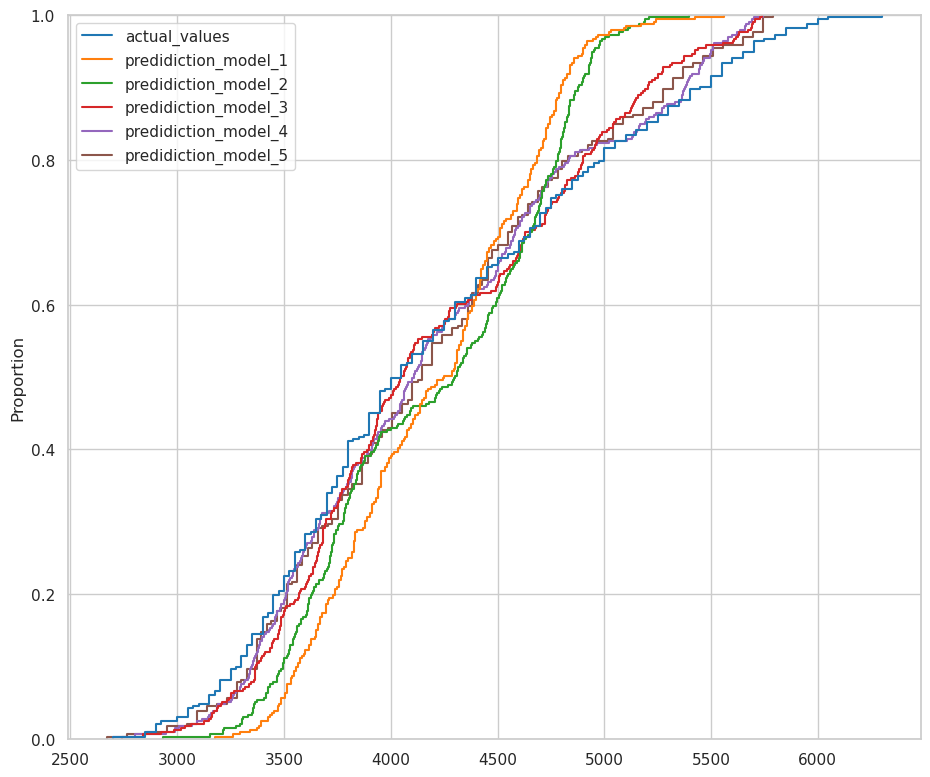

In [90]:
sns.ecdfplot(
  data=model_results
)
plt.show()

**CDFs por cada predicción**

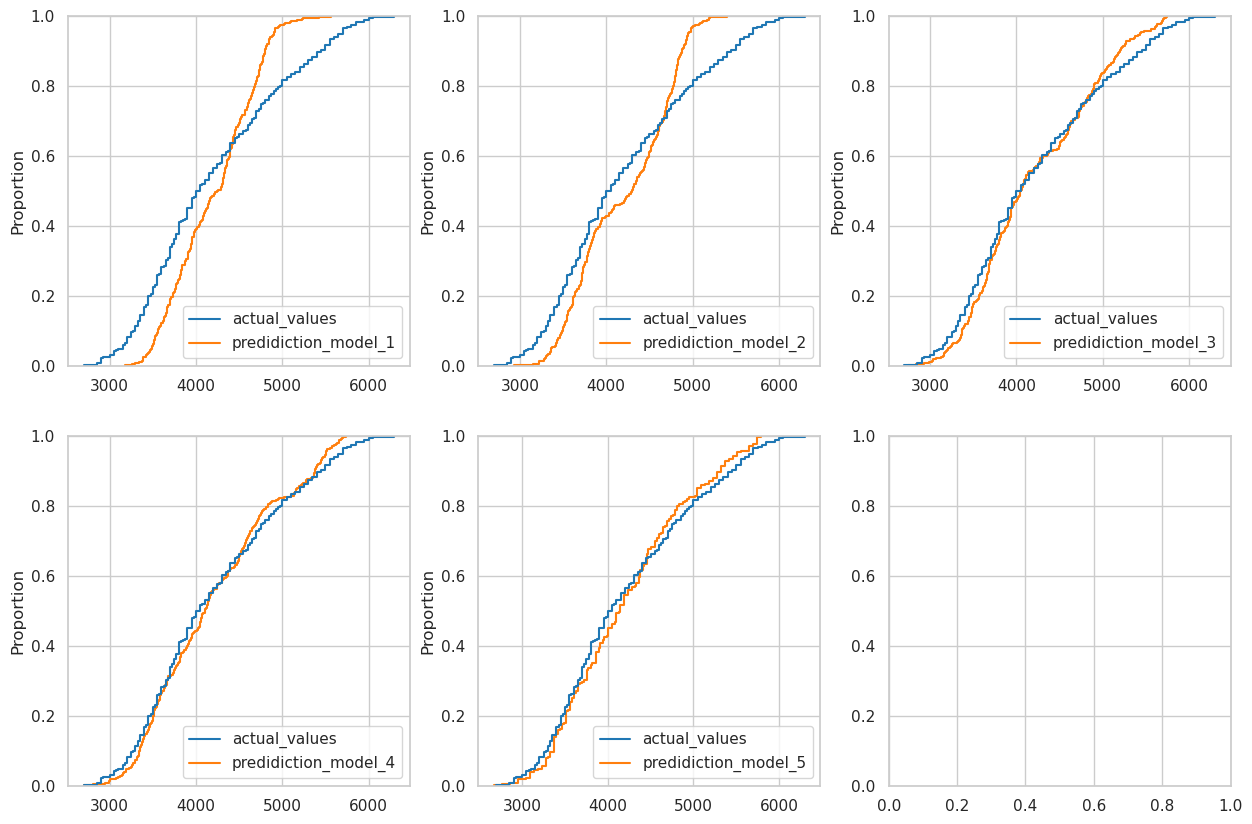

In [91]:
total_models = 5
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
row, col = 0, 0

for i in range(1, total_models+1):
  model_name= f"predidiction_model_{i}"
  sns.ecdfplot(
    data=model_results.loc[:, ["actual_values", model_name]],
    ax=axes[row][col]
  )

  col += 1
  if col > 2:
    col=0
    row=1

plt.show()

**PDFs**

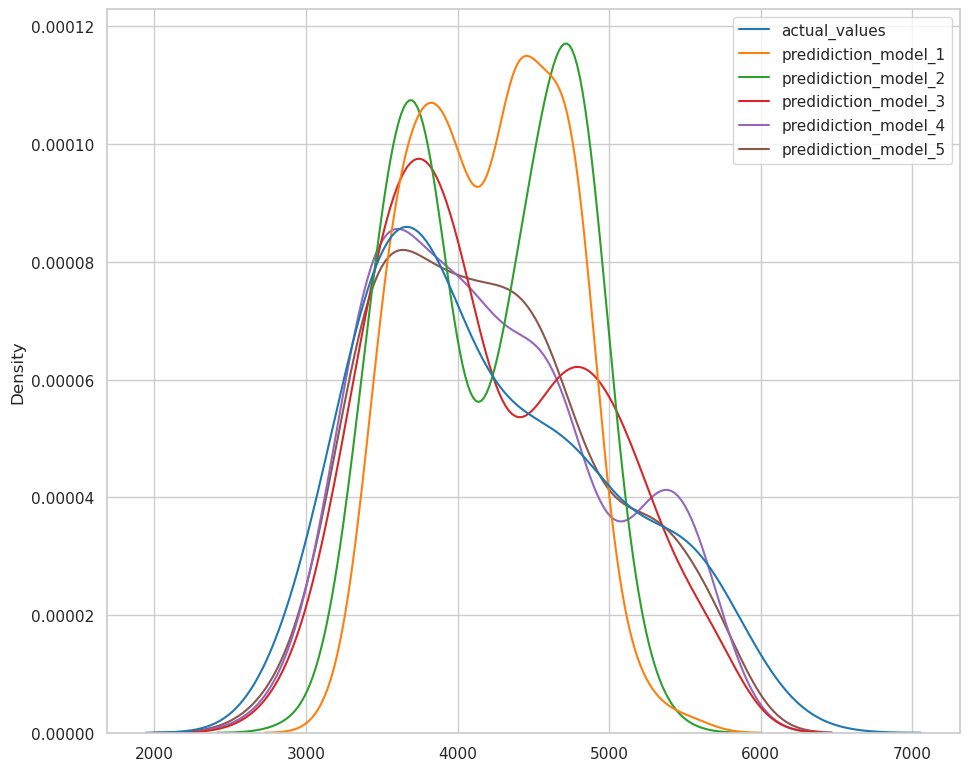

In [92]:
sns.kdeplot(
  data=model_results
)
plt.show()

**PDFs por cada predicción**

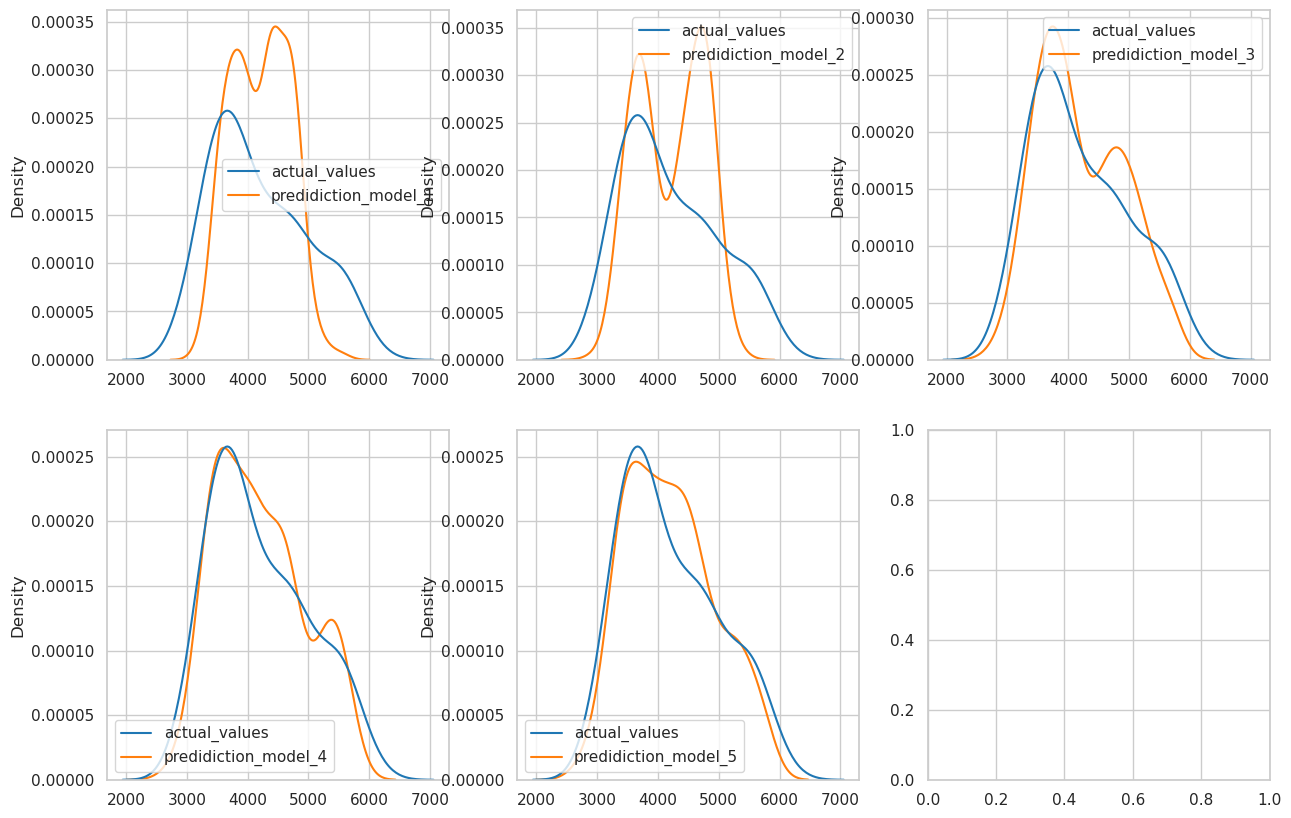

In [93]:
total_models = 5
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
row, col = 0, 0

for i in range(1, total_models+1):
  model_name= f"predidiction_model_{i}"
  sns.kdeplot(
    data=model_results.loc[:, ["actual_values", model_name]],
    ax=axes[row][col]
  )

  col += 1
  if col > 2:
    col=0
    row=1

plt.show()

### Regresión logística

Técnica estadistica para modelar la relación entre una variable categórica (variable dependiente) y una o más variables continuas o bien categóricas (independientes).

**Características de las vairbales categóricas**:
- Debe ser binaria ó multinomial.
- Binaria: Solo incluye 2 categorías → Hombre/Mujer, Si/No, Dia/Noche, Exito/Fallo.
- Miltinomial: Incluye más de 2 categorías → Alto/Mediano/Bajo, Bebé/Joven/Adulto/Anciano.

Determinar si un pingüino es una hembra en función de la longitud de su aleta, longitud y altura del pico, así como de la isla de origen.

Variable dependiente:
- `sex`: Sexo del pingüino, convertido en valors numéricos, donde `0 = male` y `1 = female`. Este dato esta asignado en la columna `numeric_sex`.

Variables independientes:
- `flipper_length_mm`: Longitud de la aleta (numérica).
- `bill_length_mm`: Longitud del pinco (numérica).
- `bill_depth_mm`: Altura del pico (numérica).
- `island`: Isla de origen (categórica).

Modelo de regresión logistica para determinar el sexo del pingüino.

In [94]:
smf.logit(
  formula="numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)",
  data=processed_penguins_df
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Thu, 04 Apr 2024   Pseudo R-squ.:                  0.4793
Time:                        15:08:37   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 61.4464      6.944      8.849      0.000      47.836      75.057
C(island)[T.Dream]         1.5596      0.493      3.163      0.002       0.593       2.526
C(island)[T.Torgersen]     1.0323      0.599      1.725      0.085      -0.141       2.205
flipper_length_mm         -0.1393      0.024     -5.874      0.000      -0.186      -0.093
bill_length_mm            -0.1413      0.045     -3.150      0.002      -0.229      -0.053
bill_depth_mm             -1.6401      0.185     -8.864      0.000      -2.003      -1.277
==========================================================================================
"""

**Definición de los elementos del resultado**:
- `coef`: Coeficientes estimados de cada variable independiente.
- `std err`: Error estandar de los coeficientes estimados.
- `z`: Valor z obtenido de dividir `coef / std err`.
- `P > |z|`: `p-value` asociado al valor `z`, indica la significancia estadistica del coeficiente.

**Interpretación**
- A mayor longitud de la aleta es menos probable que el pingüino sea hembra $-0.1393$.
- A mayor longitud del pico es menos probable que el pingüino sea hembra $-0.1413$.
- A mayor altura de la aleta es menos probable que el pingüino sea hembra $-1.6401$.
- Es más probale que encontremos más pingüinos hembras en la isla Dream.
- Es más probale que encontremos más pingüinos hembras en la isla Torgensen.

In [95]:
(
  processed_penguins_df
  .value_counts(["island", "sex"])
  .reset_index(name="count")
)

island     sex  count
0     Biscoe    male     83
1     Biscoe  female     80
2      Dream    male     62
3      Dream  female     61
4  Torgersen  female     24
5  Torgersen    male     23

Determinar si un pingüino pertenece a una determinada especie en función de la longitud de la aleta y el sexo.

Variable dependiente:
- `species`: Especie del pingüino, debe convertirse a valores numéricos.

Variables independientes:
- `flipper_length_mm`: Longitud de la aleta (numérica).
- `sex`: Sexo del pingüino (categórica).

Diferentes especies de pingüinos:

In [96]:
processed_penguins_df["species"].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

Para este ejercicio se crea un modelo para predecir si un pingüino pertenece a la especie `Gentoo`.

Para conseguirlo debemos crear una nueva variable donde se especifique cuál es la especie que se desea predecir asignando el valor 1 respectivamente.

Tendriamos:
- `Adelie = 0`
- `Gentoo = 1`
- `Chinstrap = 0`

In [97]:
# Casteamos los valores
processed_penguins_df = (
  processed_penguins_df
  .assign(is_gentoo = lambda df: df ["species"].replace(["Adelie", "Gentoo", "Chinstrap"], [0, 1, 0]))
)
processed_penguins_df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  numeric_sex  is_gentoo  
0       3750.0    male            0          0  
1       3800.0  female            1          0  
2       3250.0  female            1          0  
4       3450.0  female            1          0  
5       3650.0    male            0          0

Modelo de regresión lógistica para predecir si un pingüino es de la especie Gentoo:

In [98]:
gentoo_model = (
  smf.logit(
    formula="is_gentoo ~ flipper_length_mm + C(sex)",
    data=processed_penguins_df
  ).fit()
)

gentoo_model.params


Optimization terminated successfully.
         Current function value: 0.029010
         Iterations 12


Intercept           -183.834209
C(sex)[T.male]        -6.907611
flipper_length_mm      0.904854
dtype: float64

**Interpretación**
- Es menos probable encontrar un pingüino Gentoo que sea macho a que sea hembra ($-6.907$)
- Es más probable encontrar un pingüino Gento de aletas grandes.

A continuación se crea un data frame con los valores originales y los valores predichos por el modelo con el fin de corroborar que tan acertado esta el modelo respecto a los datos actuales.

In [99]:
gentoo_predictions_df = pd.DataFrame(
  dict(
    actual_values = processed_penguins_df["is_gentoo"],
    predicted_values = gentoo_model.predict().round()
  )
)

gentoo_predictions_df.\
  value_counts(["actual_values", "predicted_values"]).\
  reset_index(name="count")

actual_values  predicted_values  count
0              0               0.0    213
1              1               1.0    116
2              1               0.0      3
3              0               1.0      1

glosario:
- `0`: No es Gentoo
- `1`: Es Gentoo

**Interpretación de la tabla**
- `(0, 0)`: El modelo predijó que 213 pingüinos no son Gentoo cuanto estos no son Gentoo ✅
- `(1, 1)`: El modelo predijó que 116 pingüinos son Gentoo cuando estos SI son Gento ✅
- `(1, 0)`: El modelo predijó que 3 pingüinos no son Gento cuanto estos SI son Gento ❌
- `(0, 1)`: El modelo predijó que 3 pingüinos son Gento cuanto estos MO son Gento ❌


Calculamos la matríz de confusión para corroborar que tan acertado esta el modelo:

In [100]:
print(
  sklearn.metrics.confusion_matrix(
    gentoo_predictions_df["actual_values"],
    gentoo_predictions_df["predicted_values"],
  )
)

sklearn.metrics.accuracy_score(
  gentoo_predictions_df["actual_values"],
  gentoo_predictions_df["predicted_values"],
)

[[213   1]
 [  3 116]]


0.987987987987988

**Interpretación**
La matríz de confusión nos dice que:
- El modelo predijó que 213 pingüinos no son Gento de forma acertada, y predijo que 3 pingüinos no son Gento de forma equivocada (si era Gentoo). Obtuvo 3 errores.
- El modelo predijó que 116 pingüinos son Gentoo de forma correcta, y predijó que 1 pingüino era Gento de forma equivocada. Obtuvo 1 error.

El modelo obtuvo una puntuación de precisión del $98.7\%$


Tanto lo que obtuvimos en la tabla de conteo anterior como la matriz de confusuón nos muestran los mismos datos, en ambos observamos que el modelo es presiso, al predecir de forma acertada cuando un pingüino es de la especie Gentoo o no. Lo corroboramos con la puntuación de precisión del modelo.

## Paradoja de simpson

_Fenómeno en el cual es posible concluir dos cosas totalmente diferentes a partir de los mismos datos, dependiendo cómo se clasifican estos._

Al análizar la relación genral de las variables `bill_length_mm` con `bill_depth_mm` no encontramos una relación aparente.

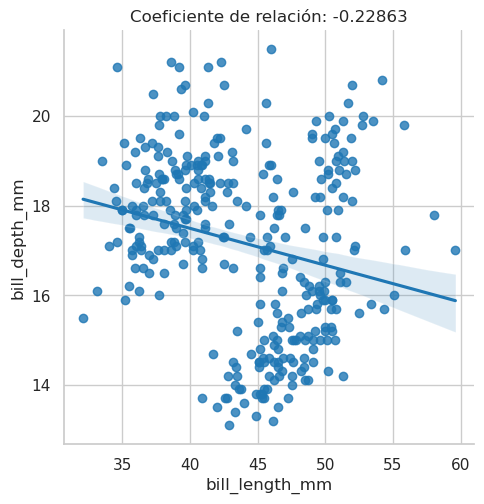

In [101]:
# Relacián general entre bill_length y bill_depth
coef_rel = np.corrcoef(x=processed_penguins_df["bill_length_mm"], y=processed_penguins_df["bill_depth_mm"])[0][1]

ax = sns.lmplot(
  data=processed_penguins_df,
  x="bill_length_mm",
  y="bill_depth_mm",
)
ax.set(title=f"Coeficiente de relación: {coef_rel.round(5)}")
plt.show()

En el gráfico se observa:
- Los datos estan dispersos.
- La línea de regresión tiene una pendiente negativa.
- A mayor longitud del pico menor es la altura del mismo.
- Coeficiente de correlación es de $-0.22863$ baja correlación negativa.

Pero, ¿Qué pasa si segmentamos los datos por especie?

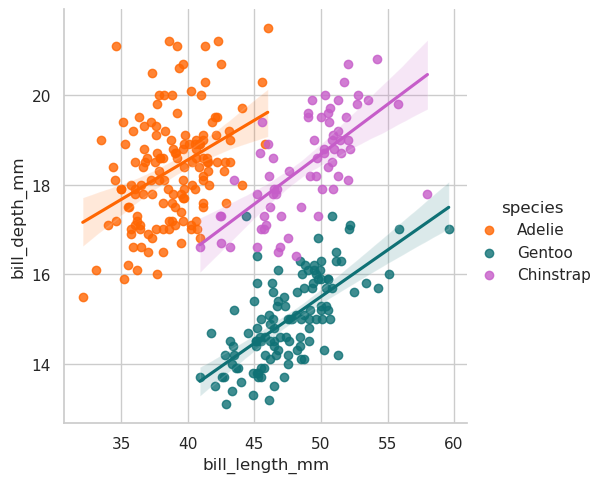

species  corr_coef
0     Adelie   0.385813
1     Gentoo   0.654023
2  Chinstrap   0.653536

In [102]:
# Relación segmentada por especie entre bill_lenth y bill_depth
sns.lmplot(
  data=processed_penguins_df,
  x="bill_length_mm",
  y="bill_depth_mm",
  hue="species",
  palette=penguin_color
)
plt.show()

# Coeficientes de correlación por especie.
species = processed_penguins_df["species"].unique()
species_corr = []

for _, specie_name in enumerate(species):
  specie_df = processed_penguins_df[processed_penguins_df["species"] == specie_name]

  species_corr.append(np.corrcoef(x=specie_df["bill_length_mm"], y=specie_df["bill_depth_mm"])[0][1])

species_corr_df = pd.DataFrame({"species": species, "corr_coef": species_corr})
species_corr_df

En el gráfico segmentado por especie se observa:
- Los datos estan menos dispersos respecto a su especie.
- La líneas de regresión tienen pendientes positivas en cada una de las especies.
- A mayor longitud del pico la altura del mismo aumenta.
- Los Coeficientes de correlación son positivos aunque indican una correlación baja.


Ahora, ¿Qué pasa si segmentamos los datos por especie y dividimos por sexo?

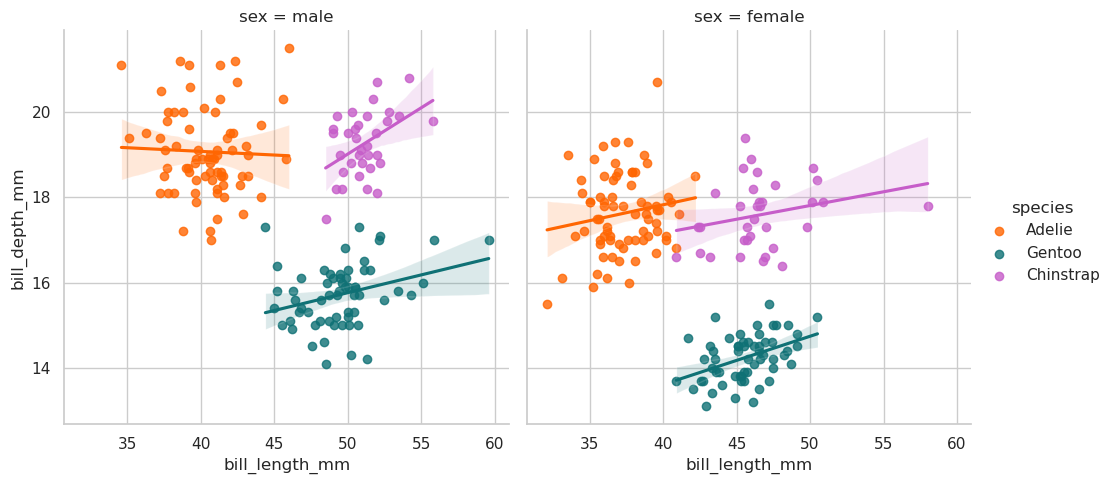

species  corr_coef
0     Adelie_female   0.160636
1       Adelie_male  -0.038247
2     Gentoo_female   0.430444
3       Gentoo_male   0.306767
4  Chinstrap_female   0.256317
5    Chinstrap_male   0.446270

In [138]:
# Relación segmentada por especie entre bill_lenth y bill_depth
sns.lmplot(
  data=processed_penguins_df,
  x="bill_length_mm",
  y="bill_depth_mm",
  hue="species",
  col="sex",
  palette=penguin_color
)
plt.show()

# Coeficientes de correlación por especie y sexo.
species_sex = []
species_corr = []

for _, specie_name in enumerate(processed_penguins_df["species"].unique()):
  condition = processed_penguins_df[processed_penguins_df["species"] == specie_name]

  specie_female_df = processed_penguins_df[(processed_penguins_df["species"] == specie_name) & (processed_penguins_df["sex"] == "female")]
  specie_male_df = processed_penguins_df[(processed_penguins_df["species"] == specie_name) & (processed_penguins_df["sex"] == "male")]

  species_corr.append(np.corrcoef(x=specie_female_df["bill_length_mm"], y=specie_female_df["bill_depth_mm"])[0][1])
  species_corr.append(np.corrcoef(x=specie_male_df["bill_length_mm"], y=specie_male_df["bill_depth_mm"])[0][1])

  species_sex.append(f"{specie_name}_female")
  species_sex.append(f"{specie_name}_male")

species_corr_df = pd.DataFrame({"species": species_sex, "corr_coef": species_corr})
species_corr_df


En el gráfico segmentado por especie y dividido por sexo se observa:
- Los machos Adelie tienen un coeficiente de correlación negativo muy cercano a $0$, por lo cual podemos decir que no hay relación entre la longitud del pico con la altura del mismo.
- Las hembras de la especie Gentoo tiene mayor correlación en la longitud del pico con la altura del mismo en comparación con los machos, en cambos casos el coeficiente es positivo.
- Los machos Chinstrap poseen una correlación positiva mayor en la longitud del pico con la altura del mismo respecto a las hembras.

La mayoria de los coeficientes observadas son positivos, sin embargo representan una correlación bastante baja.

📌 Si utilizamos un gráfico de tipo `pairplot` y aplicamos la clasificación (hue) por una determinada categoría (species) podemos ver desde un principio cuál par de variables están más (o quisa menos) relacionadas entre si y proceder directamente a un análisis más detallado.

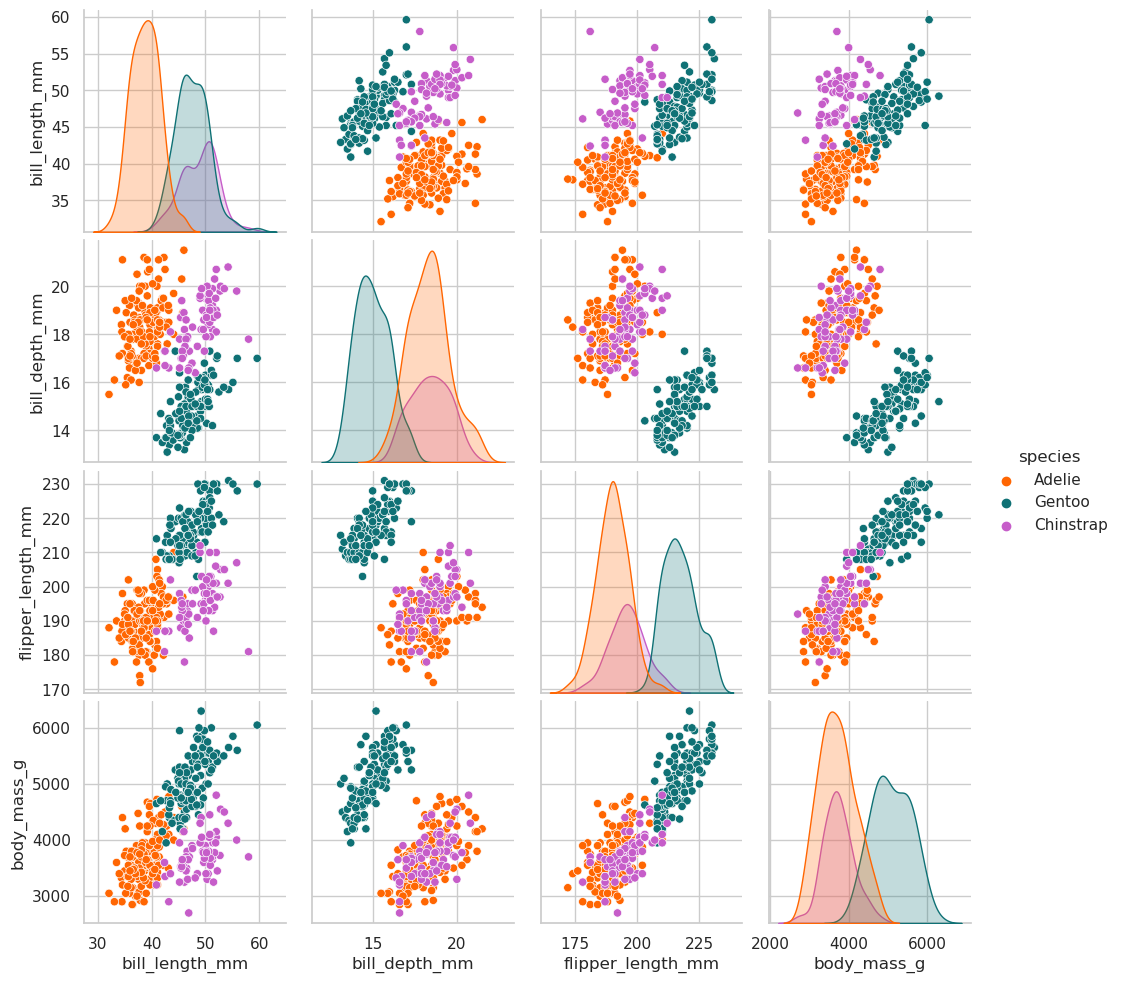

In [154]:
sns.pairplot(
  data=processed_penguins_df.iloc[:, :7],
  hue="species",
  palette=penguin_color
)
plt.show()